In [1]:
import scanpy as sc
import anndata
from scipy import io
from scipy.sparse import coo_matrix, csr_matrix
import numpy as np
import os
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [2]:
# load sparse matrix:
X = io.mmread("/Users/jezmarston/Desktop/counts.mtx")

In [3]:
# create anndata object
adata = anndata.AnnData(
    X=X.transpose().tocsr()
)

/var/folders/p9/2g0l495d3z90j21x6r_n6pxc0000gn/T/ipykernel_66986/3639189134.py:2: FutureWarning: X.dtype being converted to np.float32 from int64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.
  adata = anndata.AnnData(


In [4]:
# create anndata object
adata_pre = anndata.AnnData(
    X=X.transpose().tocsr()
)

/var/folders/p9/2g0l495d3z90j21x6r_n6pxc0000gn/T/ipykernel_66986/898443355.py:2: FutureWarning: X.dtype being converted to np.float32 from int64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.
  adata_pre = anndata.AnnData(


In [5]:
# load cell metadata:
cell_meta = pd.read_csv("/Users/jezmarston/Desktop/metadata_3D.csv")

In [6]:
# load gene names:
with open("/Users/jezmarston/Desktop/gene_names.csv", 'r') as f:
    gene_names = f.read().splitlines()

In [7]:
# set anndata observations and index obs by barcodes, var by gene names
adata.obs = cell_meta
adata.obs.index = adata.obs['barcode']
adata.var.index = gene_names

In [9]:
# set anndata observations and index obs by barcodes, var by gene names
adata_pre.obs = cell_meta
adata_pre.obs.index = adata_pre.obs['barcode']
adata_pre.var.index = gene_names

In [10]:
# load dimensional reduction:
pca = pd.read_csv("/Users/jezmarston/Desktop/pca.csv")
pca.index = adata.obs.index

In [12]:
# load dimensional reduction:
pca_pre = pd.read_csv("/Users/jezmarston/Desktop/pca.csv")
pca_pre.index = adata_pre.obs.index

In [13]:
# set pca and umap
adata.obsm['X_pca'] = pca.to_numpy()
adata.obsm['X_umap'] = np.vstack((adata.obs['UMAP_1'].to_numpy(), adata.obs['UMAP_2'].to_numpy(), adata.obs['UMAP_3'].to_numpy())).T

In [14]:
# set pca and umap
adata_pre.obsm['X_pca'] = pca_pre.to_numpy()
adata_pre.obsm['X_umap'] = np.vstack((adata_pre.obs['UMAP_1'].to_numpy(), adata_pre.obs['UMAP_2'].to_numpy(), adata_pre.obs['UMAP_3'].to_numpy())).T

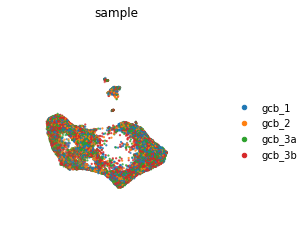

In [15]:
# plot a UMAP colored by sampleID to test:
sc.pl.umap(adata, color=['sample'], frameon=False, save=True, projection= '3d')

In [16]:
adata_pre.uns['labels_colors'] = ['#EE9A00', '#EEAEEE', '#FFA07A', '#EE0000', '#8B0000', '#B03060', '#9370DB', '#B22222', '#FF0000', '#CDCD00', '#FFD700', '#006400', '#2E8B57', '#228B22', '#00868B', '#A020F0', '#BA55D3', '#4876FF', '#FF69B4', '#483D8B', '#00FFFF', '#20B2AA', '#87CEFA', '#000000', '#8A2BE2', '#8B008B', '#ACACAC']

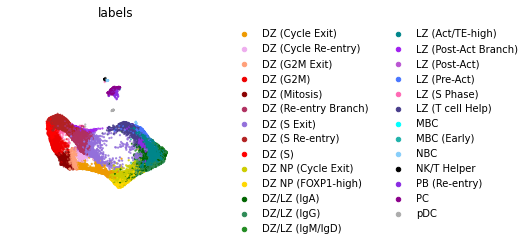

In [17]:
# plot a UMAP colored by sampleID to test:
sc.pl.umap(adata_pre, color=['labels'], frameon=False, save=True, projection= '3d')

In [ ]:
# save dataset as anndata format
adata.write('my_data_3D.h5ad')

In [ ]:
# reload dataset
adata = sc.read_h5ad('my_data_3D.h5ad')

In [ ]:
adata.obs_names

In [118]:
i1 = np.where(adata_pre.var_names == 'ERV316A3-9q21.13a')[0][0]

In [ ]:
i2 = np.where(adata_pre.var_names == 'ERV316A3-9q21.13a')[0][0]

In [21]:
data_pre = adata_pre.X.toarray()

In [22]:
data_pre

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [23]:
data_pre.shape

(16497, 88461)

In [24]:
data_pre[:, i1]

array([0., 0., 0., ..., 0., 0., 0.], dtype=float32)

In [25]:
from scipy import stats

In [ ]:
stats.pearsonr(data_pre[:, i1], data_pre[:, i2])

In [119]:
out = []
for gene in adata_pre.var_names:
    i2 = np.where(adata_pre.var_names == gene)[0][0]
    res = stats.pearsonr(data_pre[:,i1], data_pre[:,i2])
    out.append([gene, res[0], res[1]])

/Users/jezmarston/opt/anaconda3/lib/python3.9/site-packages/scipy/stats/stats.py:4023: PearsonRConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(PearsonRConstantInputWarning())


In [27]:
df = pd.DataFrame(out,columns = ['gene', 'r', 'p'])
df

gene   r   p
0                 DDX11L1 NaN NaN
1                  WASH7P NaN NaN
2               MIR6859-1 NaN NaN
3             MIR1302-2HG NaN NaN
4               MIR1302-2 NaN NaN
...                   ...  ..  ..
88456  HML3-Un-GL000214v1 NaN NaN
88457  HML3-Un-KI270742v1 NaN NaN
88458  HML1-Un-KI270742v1 NaN NaN
88459  HML3-Un-GL000218v1 NaN NaN
88460  HML1-Un-GL000218v1 NaN NaN

[88461 rows x 3 columns]

In [ ]:
df_KCNMA1 = pd.DataFrame(out,columns = ['gene', 'r', 'p'])
df_KCNMA1

In [41]:
df_BCL2A1 = pd.DataFrame(out,columns = ['gene', 'r', 'p'])
df_BCL2A1

gene   r   p
0                 DDX11L1 NaN NaN
1                  WASH7P NaN NaN
2               MIR6859-1 NaN NaN
3             MIR1302-2HG NaN NaN
4               MIR1302-2 NaN NaN
...                   ...  ..  ..
88456  HML3-Un-GL000214v1 NaN NaN
88457  HML3-Un-KI270742v1 NaN NaN
88458  HML1-Un-KI270742v1 NaN NaN
88459  HML3-Un-GL000218v1 NaN NaN
88460  HML1-Un-GL000218v1 NaN NaN

[88461 rows x 3 columns]

In [48]:
df_AICDA = pd.DataFrame(out,columns = ['gene', 'r', 'p'])
df_AICDA

gene   r   p
0                 DDX11L1 NaN NaN
1                  WASH7P NaN NaN
2               MIR6859-1 NaN NaN
3             MIR1302-2HG NaN NaN
4               MIR1302-2 NaN NaN
...                   ...  ..  ..
88456  HML3-Un-GL000214v1 NaN NaN
88457  HML3-Un-KI270742v1 NaN NaN
88458  HML1-Un-KI270742v1 NaN NaN
88459  HML3-Un-GL000218v1 NaN NaN
88460  HML1-Un-GL000218v1 NaN NaN

[88461 rows x 3 columns]

In [55]:
df_PRDM1 = pd.DataFrame(out,columns = ['gene', 'r', 'p'])
df_PRDM1

gene   r   p
0                 DDX11L1 NaN NaN
1                  WASH7P NaN NaN
2               MIR6859-1 NaN NaN
3             MIR1302-2HG NaN NaN
4               MIR1302-2 NaN NaN
...                   ...  ..  ..
88456  HML3-Un-GL000214v1 NaN NaN
88457  HML3-Un-KI270742v1 NaN NaN
88458  HML1-Un-KI270742v1 NaN NaN
88459  HML3-Un-GL000218v1 NaN NaN
88460  HML1-Un-GL000218v1 NaN NaN

[88461 rows x 3 columns]

In [79]:
df_CCR6 = pd.DataFrame(out,columns = ['gene', 'r', 'p'])
df_CCR6

gene   r   p
0                 DDX11L1 NaN NaN
1                  WASH7P NaN NaN
2               MIR6859-1 NaN NaN
3             MIR1302-2HG NaN NaN
4               MIR1302-2 NaN NaN
...                   ...  ..  ..
88456  HML3-Un-GL000214v1 NaN NaN
88457  HML3-Un-KI270742v1 NaN NaN
88458  HML1-Un-KI270742v1 NaN NaN
88459  HML3-Un-GL000218v1 NaN NaN
88460  HML1-Un-GL000218v1 NaN NaN

[88461 rows x 3 columns]

In [87]:
df_HQ7Q33 = pd.DataFrame(out,columns = ['gene', 'r', 'p'])
df_HQ7Q33

gene   r   p
0                 DDX11L1 NaN NaN
1                  WASH7P NaN NaN
2               MIR6859-1 NaN NaN
3             MIR1302-2HG NaN NaN
4               MIR1302-2 NaN NaN
...                   ...  ..  ..
88456  HML3-Un-GL000214v1 NaN NaN
88457  HML3-Un-KI270742v1 NaN NaN
88458  HML1-Un-KI270742v1 NaN NaN
88459  HML3-Un-GL000218v1 NaN NaN
88460  HML1-Un-GL000218v1 NaN NaN

[88461 rows x 3 columns]

In [120]:
df_ERV316A3 = pd.DataFrame(out,columns = ['gene', 'r', 'p'])
df_ERV316A3

gene   r   p
0                 DDX11L1 NaN NaN
1                  WASH7P NaN NaN
2               MIR6859-1 NaN NaN
3             MIR1302-2HG NaN NaN
4               MIR1302-2 NaN NaN
...                   ...  ..  ..
88456  HML3-Un-GL000214v1 NaN NaN
88457  HML3-Un-KI270742v1 NaN NaN
88458  HML1-Un-KI270742v1 NaN NaN
88459  HML3-Un-GL000218v1 NaN NaN
88460  HML1-Un-GL000218v1 NaN NaN

[88461 rows x 3 columns]

In [ ]:
df['bon'] = df.p * len(df)
df['-log10_p'] = -np.log10(df.p)
df['-log10_bon'] = -np.log10(df.bon+(1e-300))
df['-log1_bon'] = -np.log1p(df.bon)

df

In [28]:
df_KCNMA1['bon'] = df_KCNMA1.p * len(df_KCNMA1)
df_KCNMA1['-log10_p'] = -np.log10(df_KCNMA1.p)
df_KCNMA1['-log10_bon'] = -np.log10(df_KCNMA1.bon+(1e-300))
df_KCNMA1['-log1_bon'] = -np.log1p(df_KCNMA1.bon)

df_KCNMA1

/Users/jezmarston/opt/anaconda3/lib/python3.9/site-packages/pandas/core/arraylike.py:397: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


gene   r   p  bon  -log10_p  -log10_bon  -log1_bon
0                 DDX11L1 NaN NaN  NaN       NaN         NaN        NaN
1                  WASH7P NaN NaN  NaN       NaN         NaN        NaN
2               MIR6859-1 NaN NaN  NaN       NaN         NaN        NaN
3             MIR1302-2HG NaN NaN  NaN       NaN         NaN        NaN
4               MIR1302-2 NaN NaN  NaN       NaN         NaN        NaN
...                   ...  ..  ..  ...       ...         ...        ...
88456  HML3-Un-GL000214v1 NaN NaN  NaN       NaN         NaN        NaN
88457  HML3-Un-KI270742v1 NaN NaN  NaN       NaN         NaN        NaN
88458  HML1-Un-KI270742v1 NaN NaN  NaN       NaN         NaN        NaN
88459  HML3-Un-GL000218v1 NaN NaN  NaN       NaN         NaN        NaN
88460  HML1-Un-GL000218v1 NaN NaN  NaN       NaN         NaN        NaN

[88461 rows x 7 columns]

In [42]:
df_BCL2A1['bon'] = df_BCL2A1.p * len(df_BCL2A1)
df_BCL2A1['-log10_p'] = -np.log10(df_BCL2A1.p)
df_BCL2A1['-log10_bon'] = -np.log10(df_BCL2A1.bon+(1e-300))
df_BCL2A1['-log1_bon'] = -np.log1p(df_BCL2A1.bon)

df_BCL2A1

/Users/jezmarston/opt/anaconda3/lib/python3.9/site-packages/pandas/core/arraylike.py:397: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


gene   r   p  bon  -log10_p  -log10_bon  -log1_bon
0                 DDX11L1 NaN NaN  NaN       NaN         NaN        NaN
1                  WASH7P NaN NaN  NaN       NaN         NaN        NaN
2               MIR6859-1 NaN NaN  NaN       NaN         NaN        NaN
3             MIR1302-2HG NaN NaN  NaN       NaN         NaN        NaN
4               MIR1302-2 NaN NaN  NaN       NaN         NaN        NaN
...                   ...  ..  ..  ...       ...         ...        ...
88456  HML3-Un-GL000214v1 NaN NaN  NaN       NaN         NaN        NaN
88457  HML3-Un-KI270742v1 NaN NaN  NaN       NaN         NaN        NaN
88458  HML1-Un-KI270742v1 NaN NaN  NaN       NaN         NaN        NaN
88459  HML3-Un-GL000218v1 NaN NaN  NaN       NaN         NaN        NaN
88460  HML1-Un-GL000218v1 NaN NaN  NaN       NaN         NaN        NaN

[88461 rows x 7 columns]

In [49]:
df_AICDA['bon'] = df_AICDA.p * len(df_AICDA)
df_AICDA['-log10_p'] = -np.log10(df_AICDA.p)
df_AICDA['-log10_bon'] = -np.log10(df_AICDA.bon+(1e-300))
df_AICDA['-log1_bon'] = -np.log1p(df_AICDA.bon)

df_AICDA

/Users/jezmarston/opt/anaconda3/lib/python3.9/site-packages/pandas/core/arraylike.py:397: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


gene   r   p  bon  -log10_p  -log10_bon  -log1_bon
0                 DDX11L1 NaN NaN  NaN       NaN         NaN        NaN
1                  WASH7P NaN NaN  NaN       NaN         NaN        NaN
2               MIR6859-1 NaN NaN  NaN       NaN         NaN        NaN
3             MIR1302-2HG NaN NaN  NaN       NaN         NaN        NaN
4               MIR1302-2 NaN NaN  NaN       NaN         NaN        NaN
...                   ...  ..  ..  ...       ...         ...        ...
88456  HML3-Un-GL000214v1 NaN NaN  NaN       NaN         NaN        NaN
88457  HML3-Un-KI270742v1 NaN NaN  NaN       NaN         NaN        NaN
88458  HML1-Un-KI270742v1 NaN NaN  NaN       NaN         NaN        NaN
88459  HML3-Un-GL000218v1 NaN NaN  NaN       NaN         NaN        NaN
88460  HML1-Un-GL000218v1 NaN NaN  NaN       NaN         NaN        NaN

[88461 rows x 7 columns]

In [56]:
df_PRDM1['bon'] = df_PRDM1.p * len(df_PRDM1)
df_PRDM1['-log10_p'] = -np.log10(df_PRDM1.p)
df_PRDM1['-log10_bon'] = -np.log10(df_PRDM1.bon+(1e-300))
df_PRDM1['-log1_bon'] = -np.log1p(df_PRDM1.bon)

df_PRDM1

/Users/jezmarston/opt/anaconda3/lib/python3.9/site-packages/pandas/core/arraylike.py:397: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


gene   r   p  bon  -log10_p  -log10_bon  -log1_bon
0                 DDX11L1 NaN NaN  NaN       NaN         NaN        NaN
1                  WASH7P NaN NaN  NaN       NaN         NaN        NaN
2               MIR6859-1 NaN NaN  NaN       NaN         NaN        NaN
3             MIR1302-2HG NaN NaN  NaN       NaN         NaN        NaN
4               MIR1302-2 NaN NaN  NaN       NaN         NaN        NaN
...                   ...  ..  ..  ...       ...         ...        ...
88456  HML3-Un-GL000214v1 NaN NaN  NaN       NaN         NaN        NaN
88457  HML3-Un-KI270742v1 NaN NaN  NaN       NaN         NaN        NaN
88458  HML1-Un-KI270742v1 NaN NaN  NaN       NaN         NaN        NaN
88459  HML3-Un-GL000218v1 NaN NaN  NaN       NaN         NaN        NaN
88460  HML1-Un-GL000218v1 NaN NaN  NaN       NaN         NaN        NaN

[88461 rows x 7 columns]

In [80]:
df_CCR6['bon'] = df_CCR6.p * len(df_CCR6)
df_CCR6['-log10_p'] = -np.log10(df_CCR6.p)
df_CCR6['-log10_bon'] = -np.log10(df_CCR6.bon+(1e-300))
df_CCR6['-log1_bon'] = -np.log1p(df_CCR6.bon)

df_CCR6

/Users/jezmarston/opt/anaconda3/lib/python3.9/site-packages/pandas/core/arraylike.py:397: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


gene   r   p  bon  -log10_p  -log10_bon  -log1_bon
0                 DDX11L1 NaN NaN  NaN       NaN         NaN        NaN
1                  WASH7P NaN NaN  NaN       NaN         NaN        NaN
2               MIR6859-1 NaN NaN  NaN       NaN         NaN        NaN
3             MIR1302-2HG NaN NaN  NaN       NaN         NaN        NaN
4               MIR1302-2 NaN NaN  NaN       NaN         NaN        NaN
...                   ...  ..  ..  ...       ...         ...        ...
88456  HML3-Un-GL000214v1 NaN NaN  NaN       NaN         NaN        NaN
88457  HML3-Un-KI270742v1 NaN NaN  NaN       NaN         NaN        NaN
88458  HML1-Un-KI270742v1 NaN NaN  NaN       NaN         NaN        NaN
88459  HML3-Un-GL000218v1 NaN NaN  NaN       NaN         NaN        NaN
88460  HML1-Un-GL000218v1 NaN NaN  NaN       NaN         NaN        NaN

[88461 rows x 7 columns]

In [88]:
df_HQ7Q33['bon'] = df_HQ7Q33.p * len(df_HQ7Q33)
df_HQ7Q33['-log10_p'] = -np.log10(df_HQ7Q33.p)
df_HQ7Q33['-log10_bon'] = -np.log10(df_HQ7Q33.bon+(1e-300))
df_HQ7Q33['-log1_bon'] = -np.log1p(df_HQ7Q33.bon)

df_HQ7Q33

/Users/jezmarston/opt/anaconda3/lib/python3.9/site-packages/pandas/core/arraylike.py:397: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


gene   r   p  bon  -log10_p  -log10_bon  -log1_bon
0                 DDX11L1 NaN NaN  NaN       NaN         NaN        NaN
1                  WASH7P NaN NaN  NaN       NaN         NaN        NaN
2               MIR6859-1 NaN NaN  NaN       NaN         NaN        NaN
3             MIR1302-2HG NaN NaN  NaN       NaN         NaN        NaN
4               MIR1302-2 NaN NaN  NaN       NaN         NaN        NaN
...                   ...  ..  ..  ...       ...         ...        ...
88456  HML3-Un-GL000214v1 NaN NaN  NaN       NaN         NaN        NaN
88457  HML3-Un-KI270742v1 NaN NaN  NaN       NaN         NaN        NaN
88458  HML1-Un-KI270742v1 NaN NaN  NaN       NaN         NaN        NaN
88459  HML3-Un-GL000218v1 NaN NaN  NaN       NaN         NaN        NaN
88460  HML1-Un-GL000218v1 NaN NaN  NaN       NaN         NaN        NaN

[88461 rows x 7 columns]

In [121]:
df_ERV316A3['bon'] = df_ERV316A3.p * len(df_ERV316A3)
df_ERV316A3['-log10_p'] = -np.log10(df_ERV316A3.p)
df_ERV316A3['-log10_bon'] = -np.log10(df_ERV316A3.bon+(1e-300))
df_ERV316A3['-log1_bon'] = -np.log1p(df_ERV316A3.bon)

df_ERV316A3

/Users/jezmarston/opt/anaconda3/lib/python3.9/site-packages/pandas/core/arraylike.py:397: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


gene   r   p  bon  -log10_p  -log10_bon  -log1_bon
0                 DDX11L1 NaN NaN  NaN       NaN         NaN        NaN
1                  WASH7P NaN NaN  NaN       NaN         NaN        NaN
2               MIR6859-1 NaN NaN  NaN       NaN         NaN        NaN
3             MIR1302-2HG NaN NaN  NaN       NaN         NaN        NaN
4               MIR1302-2 NaN NaN  NaN       NaN         NaN        NaN
...                   ...  ..  ..  ...       ...         ...        ...
88456  HML3-Un-GL000214v1 NaN NaN  NaN       NaN         NaN        NaN
88457  HML3-Un-KI270742v1 NaN NaN  NaN       NaN         NaN        NaN
88458  HML1-Un-KI270742v1 NaN NaN  NaN       NaN         NaN        NaN
88459  HML3-Un-GL000218v1 NaN NaN  NaN       NaN         NaN        NaN
88460  HML1-Un-GL000218v1 NaN NaN  NaN       NaN         NaN        NaN

[88461 rows x 7 columns]

In [ ]:
df = df[df.bon < 0.05].sort_values('bon').reset_index(drop = True)
df

In [29]:
df_KCNMA1 = df_KCNMA1[df_KCNMA1.bon < 0.05].sort_values('bon').reset_index(drop = True)
df_KCNMA1

gene         r              p            bon    -log10_p  \
0                KCNMA1  1.000000   0.000000e+00   0.000000e+00         inf   
1     ERV316A3-9q21.13a  0.280914  8.226773e-297  7.277486e-292  296.084770   
2                  HOPX  0.259215  1.737180e-251  1.536726e-246  250.760155   
3       L1FLnI-9q21.13d  0.244788  1.192712e-223  1.055085e-218  222.923464   
4                 CAMK1  0.221650  1.012825e-182  8.959550e-178  181.994466   
...                 ...       ...            ...            ...         ...   
3669         NUP153-AS1  0.038961   5.564375e-07   4.922302e-02    6.254584   
3670               AVL9  0.038959   5.572296e-07   4.929309e-02    6.253966   
3671               STX8  0.038954   5.593795e-07   4.948327e-02    6.252293   
3672             CEP85L  0.038943   5.632719e-07   4.982760e-02    6.249282   
3673              OXLD1  0.038941   5.639666e-07   4.988905e-02    6.248747   

      -log10_bon      -log1_bon  
0     300.000000  -0.000000e+00  
1     291.138019 -7.277486e-292  
2     245.813403 -1.536726e-246  
3     217.976713 -1.055085e-218  
4     177.047714 -8.959550e-178  
...          ...            ...  
3669    1.307832  -4.804990e-02  
3670    1.307214  -4.811669e-02  
3671    1.305542  -4.829792e-02  
3672    1.302530  -4.862596e-02  
3673    1.301995  -4.868449e-02  

[3674 rows x 7 columns]

In [43]:
df_BCL2A1 = df_BCL2A1[df_BCL2A1.bon < 0.05].sort_values('bon').reset_index(drop = True)
df_BCL2A1

gene         r             p       bon  -log10_p  -log10_bon  \
0               REL  0.296373  0.000000e+00  0.000000       inf  300.000000   
1              CD83  0.566107  0.000000e+00  0.000000       inf  300.000000   
2             TRAF4  0.358843  0.000000e+00  0.000000       inf  300.000000   
3              CD40  0.347606  0.000000e+00  0.000000       inf  300.000000   
4             NFKB1  0.304412  0.000000e+00  0.000000       inf  300.000000   
...             ...       ...           ...       ...       ...         ...   
5464          AP4B1  0.038952  5.600061e-07  0.049539  6.251807    1.305055   
5465         LONRF1  0.038952  5.600571e-07  0.049543  6.251768    1.305016   
5466         FAM20B  0.038948  5.615972e-07  0.049679  6.250575    1.303823   
5467         EFL1P1  0.038947  5.619963e-07  0.049715  6.250267    1.303515   
5468  L1FLnI-11p12q  0.038947  5.619963e-07  0.049715  6.250267    1.303515   

      -log1_bon  
0     -0.000000  
1     -0.000000  
2     -0.000000  
3     -0.000000  
4     -0.000000  
...         ...  
5464  -0.048351  
5465  -0.048355  
5466  -0.048485  
5467  -0.048518  
5468  -0.048518  

[5469 rows x 7 columns]

In [50]:
df_AICDA = df_AICDA[df_AICDA.bon < 0.05].sort_values('bon').reset_index(drop = True)
df_AICDA

gene         r             p       bon  -log10_p  -log10_bon  \
0                MTPN  0.474667  0.000000e+00  0.000000       inf  300.000000   
1             FAM241A  0.458849  0.000000e+00  0.000000       inf  300.000000   
2              HNRNPK  0.337835  0.000000e+00  0.000000       inf  300.000000   
3                MCUB  0.308169  0.000000e+00  0.000000       inf  300.000000   
4               COX5B  0.331929  0.000000e+00  0.000000       inf  300.000000   
...               ...       ...           ...       ...       ...         ...   
11209         FASTKD2  0.038969  5.536732e-07  0.048978  6.256747    1.309995   
11210   RP11-552M11.4  0.038959  5.573790e-07  0.049306  6.253849    1.307098   
11211            CLPB  0.038954  5.591510e-07  0.049463  6.252471    1.305719   
11212  ERVLE-22q13.33  0.038950  5.608887e-07  0.049617  6.251123    1.304371   
11213    ERVL-16p12.2  0.038938  5.650270e-07  0.049983  6.247931    1.301179   

       -log1_bon  
0      -0.000000  
1      -0.000000  
2      -0.000000  
3      -0.000000  
4      -0.000000  
...          ...  
11209  -0.047817  
11210  -0.048129  
11211  -0.048279  
11212  -0.048425  
11213  -0.048774  

[11214 rows x 7 columns]

In [57]:
df_PRDM1 = df_PRDM1[df_PRDM1.bon < 0.05].sort_values('bon').reset_index(drop = True)
df_PRDM1

gene         r             p       bon  -log10_p  -log10_bon  \
0       SEC24D  0.310485  0.000000e+00  0.000000       inf  300.000000   
1       JCHAIN  0.326373  0.000000e+00  0.000000       inf  300.000000   
2        NEAT1  0.304662  0.000000e+00  0.000000       inf  300.000000   
3         SSR2  0.303596  0.000000e+00  0.000000       inf  300.000000   
4         ZBP1  0.471509  0.000000e+00  0.000000       inf  300.000000   
...        ...       ...           ...       ...       ...         ...   
4283     PBRM1  0.039013  5.375310e-07  0.047551  6.269597    1.322845   
4284    GTF2A2  0.038999  5.426991e-07  0.048008  6.265441    1.318689   
4285      CLN5  0.038996  5.437524e-07  0.048101  6.264599    1.317847   
4286  IGLV3-19  0.038989  5.462856e-07  0.048325  6.262580    1.315828   
4287     ZZEF1  0.038968  5.538870e-07  0.048997  6.256579    1.309827   

      -log1_bon  
0     -0.000000  
1     -0.000000  
2     -0.000000  
3     -0.000000  
4     -0.000000  
...         ...  
4283  -0.046455  
4284  -0.046891  
4285  -0.046980  
4286  -0.047194  
4287  -0.047835  

[4288 rows x 7 columns]

In [81]:
df_CCR6 = df_CCR6[df_CCR6.bon < 0.05].sort_values('bon').reset_index(drop = True)
df_CCR6

gene         r              p            bon    -log10_p  \
0               CCR6  1.000000   0.000000e+00   0.000000e+00         inf   
1    L1FLnI-10q21.1j  0.238807  1.230440e-212  1.088459e-207  211.909940   
2              HCG24  0.224835  4.361128e-188  3.857898e-183  187.360401   
3             FAM27B  0.168857  8.962193e-106  7.928046e-101  105.047586   
4       L1FLnI-5p12w  0.168857  8.962193e-106  7.928046e-101  105.047586   
..               ...       ...            ...            ...         ...   
402            C1DP5  0.039138   4.944182e-07   4.373673e-02    6.305906   
403         FAR1-IT1  0.039059   5.212592e-07   4.611111e-02    6.282946   
404             TOX2  0.038986   5.474218e-07   4.842548e-02    6.261678   
405        MRTFA-AS1  0.038980   5.494563e-07   4.860546e-02    6.260067   
406    Metazoa-SRP.8  0.038980   5.494563e-07   4.860546e-02    6.260067   

     -log10_bon      -log1_bon  
0    300.000000  -0.000000e+00  
1    206.963188 -1.088459e-207  
2    182.413649 -3.857898e-183  
3    100.100834 -7.928046e-101  
4    100.100834 -7.928046e-101  
..          ...            ...  
402    1.359154  -4.280728e-02  
403    1.336194  -4.507959e-02  
404    1.314926  -4.728950e-02  
405    1.313315  -4.746114e-02  
406    1.313315  -4.746114e-02  

[407 rows x 7 columns]

In [89]:
df_HQ7Q33 = df_HQ7Q33[df_HQ7Q33.bon < 0.05].sort_values('bon').reset_index(drop = True)
df_HQ7Q33

gene         r              p            bon    -log10_p  \
0      HARLEQUIN-7q33a  1.000000   0.000000e+00   0.000000e+00         inf   
1        RP11-134L10.2  0.766814   0.000000e+00   0.000000e+00         inf   
2     HARLEQUIN-1q32.1  0.178135  1.097158e-117  9.705572e-113  116.959731   
3                 HOPX  0.131041   4.301710e-64   3.805336e-59   63.366359   
4    HARLEQUIN-10q23.1  0.128726   6.803317e-62   6.018282e-57   61.167279   
..                 ...       ...            ...            ...         ...   
693               NPM3  0.039013   5.377324e-07   4.756835e-02    6.269434   
694              LIMS1  0.038993   5.449386e-07   4.820582e-02    6.263652   
695           EPM2AIP1  0.038984   5.482211e-07   4.849619e-02    6.261044   
696              EIF4B  0.038983   5.483159e-07   4.850457e-02    6.260969   
697              MED28  0.038980   5.494602e-07   4.860580e-02    6.260064   

     -log10_bon      -log1_bon  
0    300.000000  -0.000000e+00  
1    300.000000  -0.000000e+00  
2    112.012979 -9.705572e-113  
3     58.419607  -3.805336e-59  
4     56.220527  -6.018282e-57  
..          ...            ...  
693    1.322682  -4.647162e-02  
694    1.316901  -4.707996e-02  
695    1.314292  -4.735694e-02  
696    1.314217  -4.736493e-02  
697    1.313312  -4.746147e-02  

[698 rows x 7 columns]

In [122]:
df_ERV316A3 = df_ERV316A3[df_ERV316A3.bon < 0.05].sort_values('bon').reset_index(drop = True)
df_ERV316A3

gene         r              p            bon    -log10_p  \
0       L1FLnI-9q21.13d  0.665384   0.000000e+00   0.000000e+00         inf   
1     ERV316A3-9q21.13a  1.000000   0.000000e+00   0.000000e+00         inf   
2                KCNMA1  0.280914  8.226773e-297  7.277486e-292  296.084770   
3                CEMIP2  0.269644  9.564526e-273  8.460875e-268  272.019337   
4              CCDC144B  0.252424  3.691436e-238  3.265481e-233  237.432805   
...                 ...       ...            ...            ...         ...   
2486            STAG3L3  0.038961   5.566615e-07   4.924284e-02    6.254409   
2487             TMEM80  0.038957   5.582691e-07   4.938504e-02    6.253156   
2488             VCPKMT  0.038954   5.593734e-07   4.948273e-02    6.252298   
2489             ANKRA2  0.038944   5.628265e-07   4.978820e-02    6.249625   
2490               OLA1  0.038939   5.648282e-07   4.996527e-02    6.248084   

      -log10_bon      -log1_bon  
0     300.000000  -0.000000e+00  
1     300.000000  -0.000000e+00  
2     291.138019 -7.277486e-292  
3     267.072585 -8.460875e-268  
4     232.486053 -3.265481e-233  
...          ...            ...  
2486    1.307657  -4.806880e-02  
2487    1.306405  -4.820432e-02  
2488    1.305546  -4.829741e-02  
2489    1.302874  -4.858843e-02  
2490    1.301332  -4.875709e-02  

[2491 rows x 7 columns]

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize = (3,5))

ax = sns.barplot(data = df[2:17], x = '-log10_p', y = 'gene', color = 'grey')

plt.show()

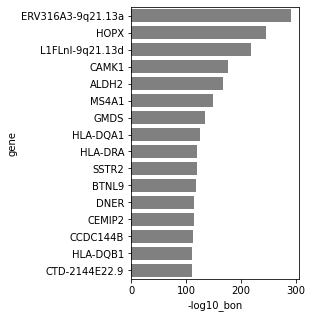

In [35]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize = (3,5))

ax = sns.barplot(data = df_KCNMA1[1:17], x = '-log10_bon', y = 'gene', color = 'grey')

plt.show()

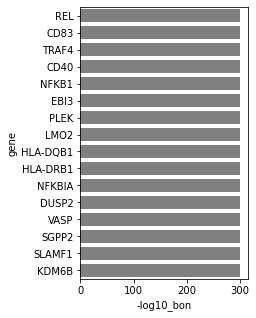

In [61]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize = (3,5))

ax = sns.barplot(data = df_BCL2A1[0:16], x = '-log10_bon', y = 'gene', color = 'grey')

plt.show()

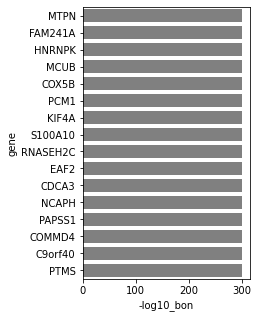

In [62]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize = (3,5))

ax = sns.barplot(data = df_AICDA[0:16], x = '-log10_bon', y = 'gene', color = 'grey')

plt.show()

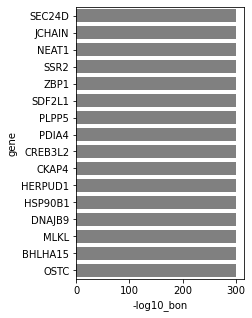

In [63]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize = (3,5))

ax = sns.barplot(data = df_PRDM1[0:16], x = '-log10_bon', y = 'gene', color = 'grey')

plt.show()

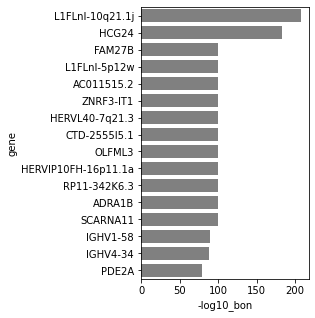

In [83]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize = (3,5))

ax = sns.barplot(data = df_CCR6[1:17], x = '-log10_bon', y = 'gene', color = 'grey')

plt.show()

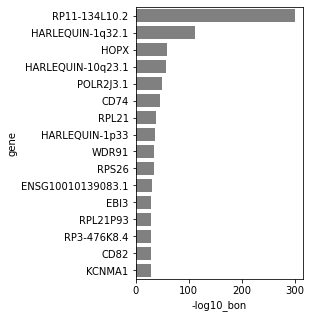

In [90]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize = (3,5))

ax = sns.barplot(data = df_HQ7Q33[1:17], x = '-log10_bon', y = 'gene', color = 'grey')

plt.show()

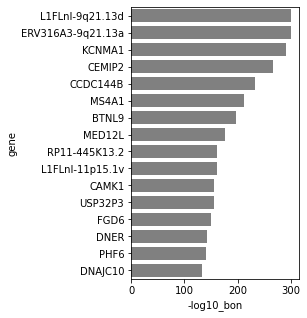

In [130]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize = (3,5))

ax = sns.barplot(data = (df_ERV316A3[0:16]), x = '-log10_bon', y = 'gene', color = 'grey')

plt.show()

In [38]:
df_KCNMA1.to_csv('KCNMA1_Co_List.csv')

In [45]:
df_BCL2A1.to_csv('BCL2A1_Co_List.csv')

In [52]:
df_AICDA.to_csv('AICDA_Co_List.csv')

In [64]:
df_PRDM1.to_csv('PRDM1_Co_List.csv')

In [84]:
df_CCR6.to_csv('CCR6_Co_List.csv')

In [91]:
df_HQ7Q33.to_csv('HQ7Q33_Co_List.csv')

In [131]:
df_ERV316A3.to_csv('ERV316A3_Co_List.csv')

In [75]:
adata_pre.obs

orig.ident  nCount_RNA  nFeature_RNA  percent.mt  \
barcode                                                               
AAACCTGAGCCAGAAC_1      gcb_1        3180          1253    1.226415   
AAACCTGAGGACTGGT_1      gcb_1        4382          1525    1.871292   
AAACCTGAGTTCCACA_1      gcb_1        4899          1706    2.939375   
AAACCTGCATCGGTTA_1      gcb_1        6615          2215    2.071051   
AAACCTGGTCACCTAA_1      gcb_1        3906          1408    3.430620   
...                       ...         ...           ...         ...   
TTTGTTGCAGTAACGG_4     gcb_3b        6332          2251    8.354390   
TTTGTTGCATCCGCGA_4     gcb_3b       11053          3306    7.527368   
TTTGTTGCATCCGGTG_4     gcb_3b       10061          2990    7.524103   
TTTGTTGCATTCTCCG_4     gcb_3b        8315          2795    7.733013   
TTTGTTGGTCTACTGA_4     gcb_3b        8548          2517   11.464670   

                    percent.HERV  percent.L1  percent.TE  sample  \
barcode                                                            
AAACCTGAGCCAGAAC_1      0.345912    0.911950    1.257862   gcb_1   
AAACCTGAGGACTGGT_1      0.228206    0.616157    0.844363   gcb_1   
AAACCTGAGTTCCACA_1      0.469484    1.571749    2.041233   gcb_1   
AAACCTGCATCGGTTA_1      0.317460    0.816327    1.133787   gcb_1   
AAACCTGGTCACCTAA_1      0.665643    1.612903    2.278546   gcb_1   
...                          ...         ...         ...     ...   
TTTGTTGCAGTAACGG_4      0.347442    2.132028    2.479469  gcb_3b   
TTTGTTGCATCCGCGA_4      0.262372    2.768479    3.030851  gcb_3b   
TTTGTTGCATCCGGTG_4      0.407514    1.719511    2.127025  gcb_3b   
TTTGTTGCATTCTCCG_4      0.300661    1.707757    2.008419  gcb_3b   
TTTGTTGGTCTACTGA_4      0.292466    1.754796    2.047263  gcb_3b   

                    integrated_snn_res.2  seurat_clusters  \
barcode                                                     
AAACCTGAGCCAGAAC_1                     0                0   
AAACCTGAGGACTGGT_1                     3                3   
AAACCTGAGTTCCACA_1                     1                1   
AAACCTGCATCGGTTA_1                    12               12   
AAACCTGGTCACCTAA_1                     5                5   
...                                  ...              ...   
TTTGTTGCAGTAACGG_4                     3                3   
TTTGTTGCATCCGCGA_4                    10               10   
TTTGTTGCATCCGGTG_4                    11               11   
TTTGTTGCATTCTCCG_4                     9                9   
TTTGTTGGTCTACTGA_4                    14               14   

                   predicted.celltype.l1        predicted.celltype.l2  \
barcode                                                                 
AAACCTGAGCCAGAAC_1     Germinal center B                        DZ/LZ   
AAACCTGAGGACTGGT_1     Germinal center B                        DZ/LZ   
AAACCTGAGTTCCACA_1     Germinal center B                        DZ/LZ   
AAACCTGCATCGGTTA_1     Germinal center B          DZ-nonproliferative   
AAACCTGGTCACCTAA_1     Germinal center B                        DZ/LZ   
...                                  ...                          ...   
TTTGTTGCAGTAACGG_4     Germinal center B  DZ-nonproliferative_FOXP1hi   
TTTGTTGCATCCGCGA_4             Cycling B              DZ_G2M_CCNBHigh   
TTTGTTGCATCCGGTG_4     Germinal center B  DZ-nonproliferative_FOXP1hi   
TTTGTTGCATTCTCCG_4     Germinal center B                        DZ/LZ   
TTTGTTGGTCTACTGA_4     Germinal center B                           LZ   

                                labels  DZ.LZ   DZLZ             barcode  \
barcode                                                                    
AAACCTGAGCCAGAAC_1         DZ/LZ (IgG)  DZ/LZ  DZ/LZ  AAACCTGAGCCAGAAC_1   
AAACCTGAGGACTGGT_1  DZ NP (Cycle Exit)     DZ     DZ  AAACCTGAGGACTGGT_1   
AAACCTGAGTTCCACA_1     DZ/LZ (IgM/IgD)  DZ/LZ  DZ/LZ  AAACCTGAGTTCCACA_1   
AAACCTGCATCGGTTA_1         DZ (S Exit)     DZ     DZ  AAACCTGCATCGGTTA_1   
AAACCTGGTC

In [67]:
adata_pre.obs.groupby(['sample']).count()

orig.ident  nCount_RNA  nFeature_RNA  percent.mt  percent.HERV  \
sample                                                                   
gcb_1         4449        4449          4449        4449          4449   
gcb_2         3372        3372          3372        3372          3372   
gcb_3a        4242        4242          4242        4242          4242   
gcb_3b        4434        4434          4434        4434          4434   

        percent.L1  percent.TE  integrated_snn_res.2  seurat_clusters  \
sample                                                                  
gcb_1         4449        4449                  4449             4449   
gcb_2         3372        3372                  3372             3372   
gcb_3a        4242        4242                  4242             4242   
gcb_3b        4434        4434                  4434             4434   

        predicted.celltype.l1  predicted.celltype.l2  labels  DZ.LZ  DZLZ  \
sample                                                                      
gcb_1                    4449                   4449    4449   4449  4449   
gcb_2                    3372                   3372    3372   3372  3372   
gcb_3a                   4242                   4242    4242   4242  4242   
gcb_3b                   4434                   4434    4434   4434  4434   

        barcode  UMAP_1  UMAP_2  UMAP_3  
sample                                   
gcb_1      4449    4449    4449    4449  
gcb_2      3372    3372    3372    3372  
gcb_3a     4242    4242    4242    4242  
gcb_3b     4434    4434    4434    4434

In [68]:
num_tot_cells = adata_pre.obs.groupby(['sample']).count()
num_tot_cells = dict(zip(num_tot_cells.index, num_tot_cells.seurat_clusters))
num_tot_cells

{'gcb_1': 4449, 'gcb_2': 3372, 'gcb_3a': 4242, 'gcb_3b': 4434}

In [69]:
cell_type_counts = adata_pre.obs.groupby(['sample', 'labels']).count()
cell_type_counts = cell_type_counts[cell_type_counts.sum(axis = 1) > 0].reset_index()
cell_type_counts

sample               labels  orig.ident  nCount_RNA  nFeature_RNA  \
0     gcb_1      DZ (Cycle Exit)         219         219           219   
1     gcb_1  DZ (Cycle Re-entry)         109         109           109   
2     gcb_1        DZ (G2M Exit)          90          90            90   
3     gcb_1             DZ (G2M)         153         153           153   
4     gcb_1         DZ (Mitosis)         170         170           170   
..      ...                  ...         ...         ...           ...   
102  gcb_3b                  NBC          25          25            25   
103  gcb_3b          NK/T Helper          12          12            12   
104  gcb_3b        PB (Re-entry)          29          29            29   
105  gcb_3b                   PC          48          48            48   
106  gcb_3b                  pDC          60          60            60   

     percent.mt  percent.HERV  percent.L1  percent.TE  integrated_snn_res.2  \
0           219           219         219         219                   219   
1           109           109         109         109                   109   
2            90            90          90          90                    90   
3           153           153         153         153                   153   
4           170           170         170         170                   170   
..          ...           ...         ...         ...                   ...   
102          25            25          25          25                    25   
103          12            12          12          12                    12   
104          29            29          29          29                    29   
105          48            48          48          48                    48   
106          60            60          60          60                    60   

     seurat_clusters  predicted.celltype.l1  predicted.celltype.l2  DZ.LZ  \
0                219                    219                    219    219   
1                109                    109                    109    109   
2                 90                     90                     90     90   
3                153                    153                    153    153   
4                170                    170                    170    170   
..               ...                    ...                    ...    ...   
102               25                     25                     25     25   
103               12                     12                     12     12   
104               29                     29                     29     29   
105               48                     48                     48     48   
106               60                     60                     60     60   

     DZLZ  barcode  UMAP_1  UMAP_2  UMAP_3  
0     219      219     219     219     219  
1     109      109     109     109     109  
2      90       90      90      90      90  
3     153      153     153     153     153  
4     170      170     170     170     170  
..    ...      ...     ...     ...     ...  
102    25       25      25      25      25  
103    12       12      12      12      12  
104    29       29      29      29      29  
105    48       48      48      48      48  
106    60       60      60      60      60  

[107 rows x 19 columns]

In [70]:
cell_type_counts['total_cells'] = cell_type_counts['sample'].map(num_tot_cells).astype(int)

cell_type_counts['frequency'] = cell_type_counts['orig.ident'] / cell_type_counts['total_cells']

cell_type_counts

sample               labels  orig.ident  nCount_RNA  nFeature_RNA  \
0     gcb_1      DZ (Cycle Exit)         219         219           219   
1     gcb_1  DZ (Cycle Re-entry)         109         109           109   
2     gcb_1        DZ (G2M Exit)          90          90            90   
3     gcb_1             DZ (G2M)         153         153           153   
4     gcb_1         DZ (Mitosis)         170         170           170   
..      ...                  ...         ...         ...           ...   
102  gcb_3b                  NBC          25          25            25   
103  gcb_3b          NK/T Helper          12          12            12   
104  gcb_3b        PB (Re-entry)          29          29            29   
105  gcb_3b                   PC          48          48            48   
106  gcb_3b                  pDC          60          60            60   

     percent.mt  percent.HERV  percent.L1  percent.TE  integrated_snn_res.2  \
0           219           219         219         219                   219   
1           109           109         109         109                   109   
2            90            90          90          90                    90   
3           153           153         153         153                   153   
4           170           170         170         170                   170   
..          ...           ...         ...         ...                   ...   
102          25            25          25          25                    25   
103          12            12          12          12                    12   
104          29            29          29          29                    29   
105          48            48          48          48                    48   
106          60            60          60          60                    60   

     ...  predicted.celltype.l1  predicted.celltype.l2  DZ.LZ  DZLZ  barcode  \
0    ...                    219                    219    219   219      219   
1    ...                    109                    109    109   109      109   
2    ...                     90                     90     90    90       90   
3    ...                    153                    153    153   153      153   
4    ...                    170                    170    170   170      170   
..   ...                    ...                    ...    ...   ...      ...   
102  ...                     25                     25     25    25       25   
103  ...                     12                     12     12    12       12   
104  ...                     29                     29     29    29       29   
105  ...                     48                     48     48    48       48   
106  ...                     60                     60     60    60       60   

     UMAP_1  UMAP_2  UMAP_3  total_cells  frequency  
0       219     219     219         4449   0.049225  
1       109     109     109         4449   0.024500  
2        90      90      90         4449   0.020229  
3       153     153     153         4449   0.034390  
4       170     170     170         4449   0.038211  
..      ...     ...     ...          ...        ...  
102      25      25      25         4434   0.005638  
103      12      12      12         4434   0.002706  
104      29      29      29         4434   0.006540  
105      48      48      48         4434   0.010825  
106      60      60      60         4434   0.013532  

[107 rows x 21 columns]

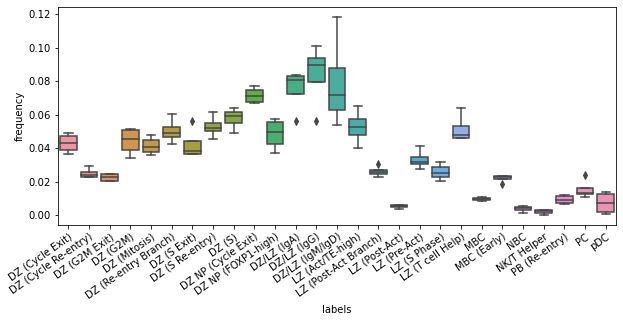

In [71]:
import matplotlib.pyplot as plt

#my_pal = {"versicolor": "g", "setosa": "b", "virginica":"m"}
#sns.boxplot(x=df["species"], y=df["sepal_length"], palette=my_pal)
#plt.show()

plt.figure(figsize = (10,4))

ax = sns.boxplot(data = cell_type_counts, x = 'labels', y = 'frequency')

plt.xticks(rotation = 35, rotation_mode = 'anchor', ha = 'right')

plt.show()

In [96]:
TE_percent = adata_pre.obs['labels']


In [97]:
TE_percent

barcode
AAACCTGAGCCAGAAC_1           DZ/LZ (IgG)
AAACCTGAGGACTGGT_1    DZ NP (Cycle Exit)
AAACCTGAGTTCCACA_1       DZ/LZ (IgM/IgD)
AAACCTGCATCGGTTA_1           DZ (S Exit)
AAACCTGGTCACCTAA_1      LZ (Act/TE-high)
                             ...        
TTTGTTGCAGTAACGG_4    DZ NP (Cycle Exit)
TTTGTTGCATCCGCGA_4              DZ (G2M)
TTTGTTGCATCCGGTG_4       DZ (Cycle Exit)
TTTGTTGCATTCTCCG_4    DZ NP (FOXP1-high)
TTTGTTGGTCTACTGA_4          LZ (Pre-Act)
Name: labels, Length: 16497, dtype: category
Categories (27, object): ['DZ (Cycle Exit)', 'DZ (Cycle Re-entry)', 'DZ (G2M Exit)', 'DZ (G2M)', ..., 'NK/T Helper', 'PB (Re-entry)', 'PC', 'pDC']

In [98]:
import matplotlib.pyplot as plt

#my_pal = {"versicolor": "g", "setosa": "b", "virginica":"m"}
#sns.boxplot(x=df["species"], y=df["sepal_length"], palette=my_pal)
#plt.show()

plt.figure(figsize = (10,4))

ax = sns.boxplot(data = TE_percent, x = 'labels', y = 'percent.TE')

plt.xticks(rotation = 35, rotation_mode = 'anchor', ha = 'right')

plt.show()

ValueError: Could not interpret input 'labels'

<Figure size 720x288 with 0 Axes>

In [ ]:
cell_type_counts.sample

In [ ]:
my_pal = {"versicolor": "g", "setosa": "b", "virginica":"m"}
sns.boxplot(x=df["species"], y=df["sepal_length"], palette=my_pal)
plt.show()

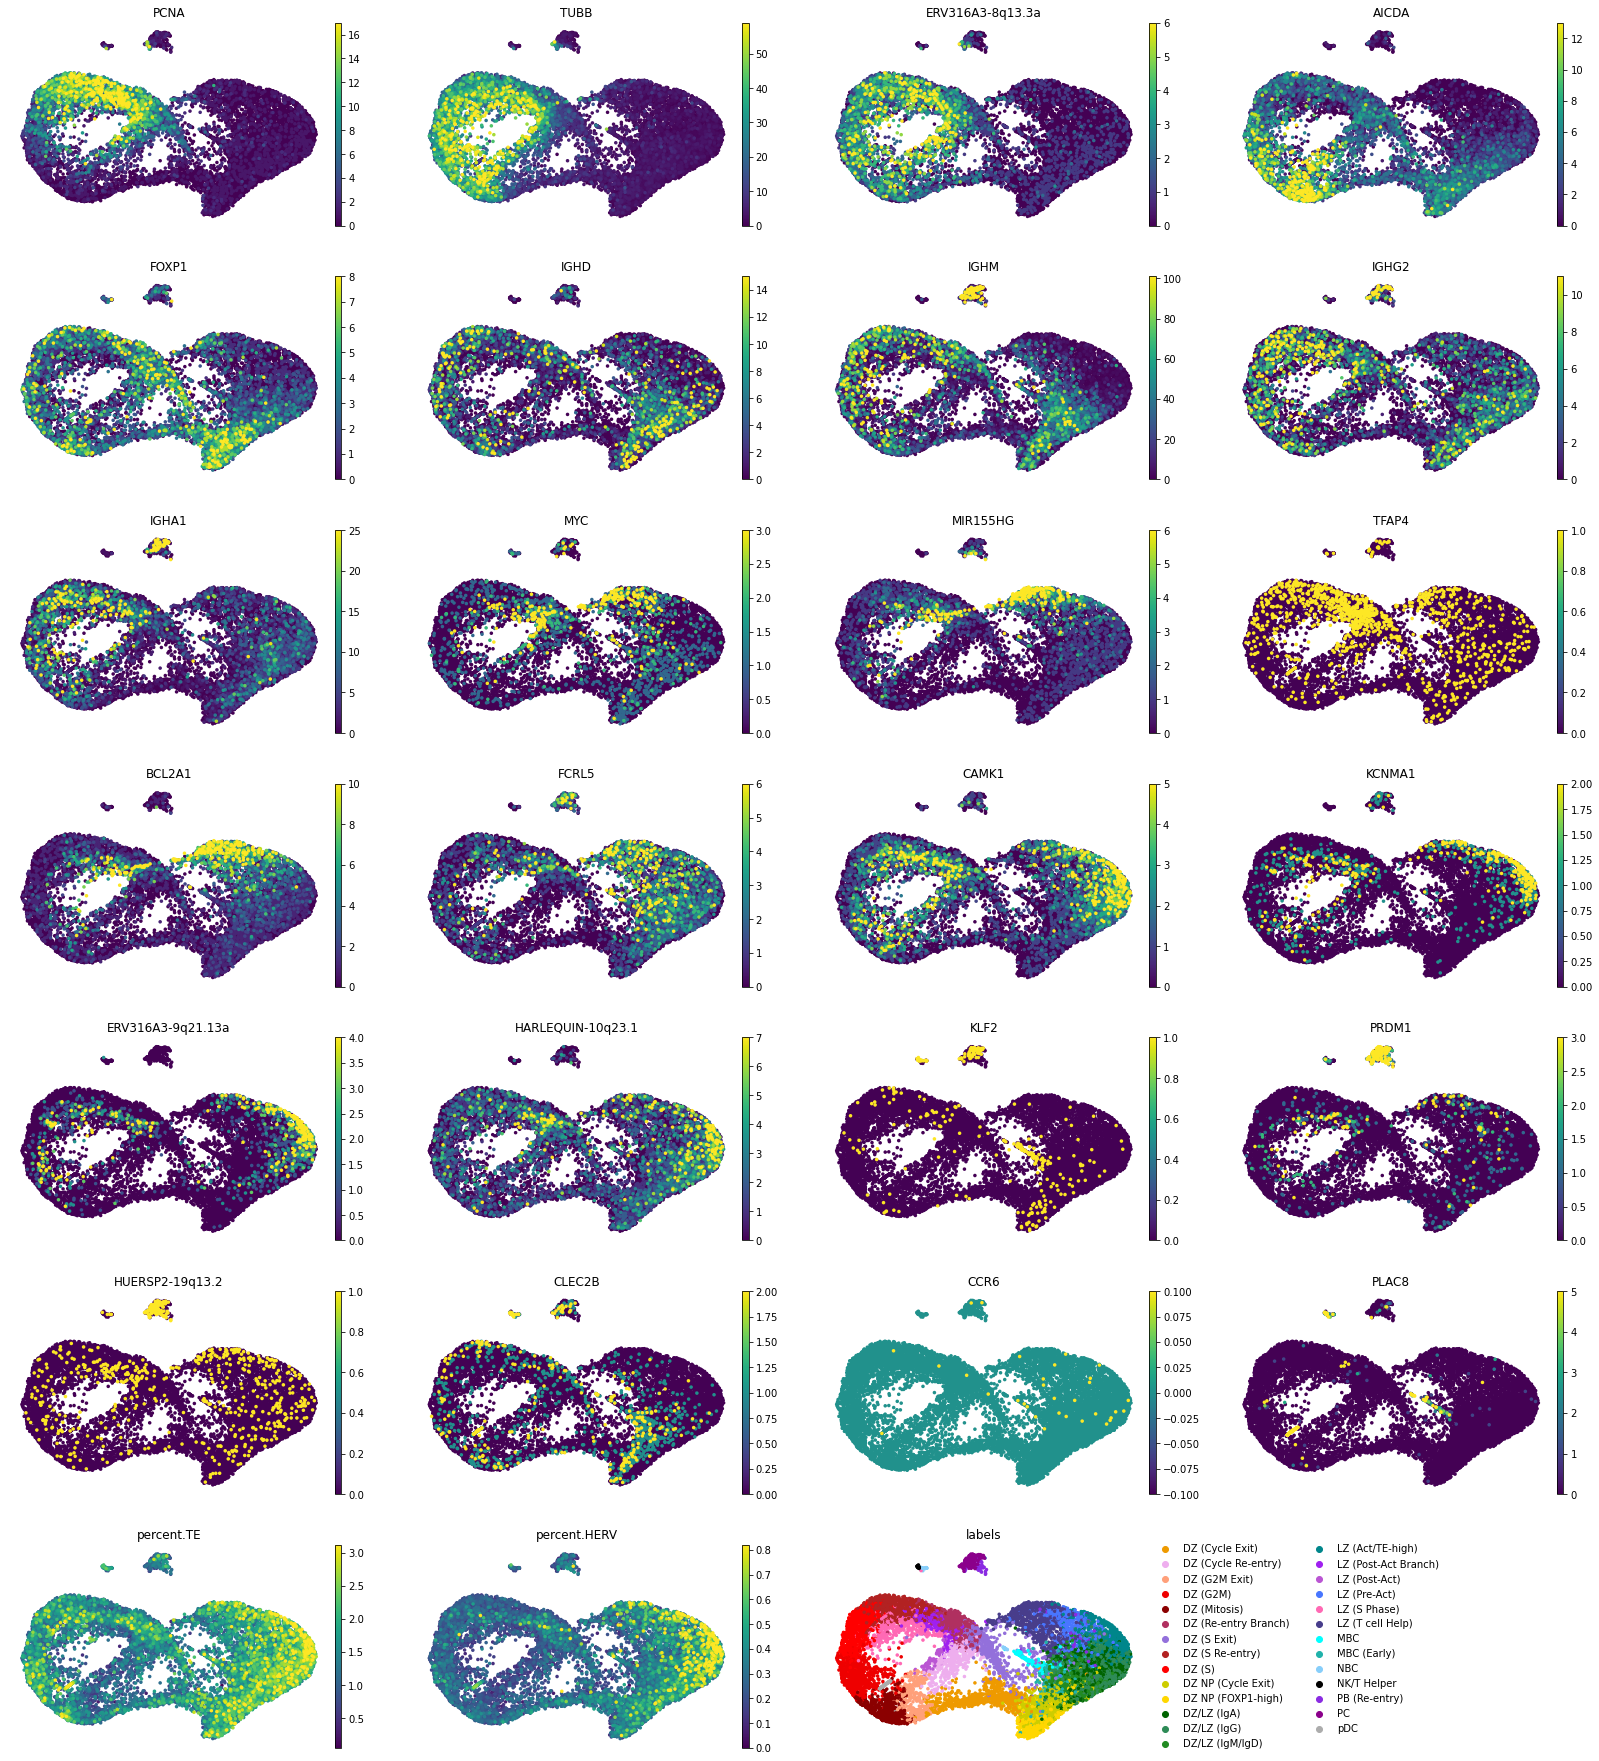

In [112]:
sc.pl.umap(adata_pre, color=["PCNA", "TUBB", "ERV316A3-8q13.3a", "AICDA", "FOXP1", "IGHD", "IGHM", "IGHG2", "IGHA1", "MYC", "MIR155HG", "TFAP4", "BCL2A1", "FCRL5", "CAMK1", "KCNMA1", "ERV316A3-9q21.13a", "HARLEQUIN-10q23.1", "KLF2", "PRDM1", "HUERSP2-19q13.2", "CLEC2B", "CCR6", "PLAC8", "percent.TE", "percent.HERV", "labels"], s=50, frameon=False, ncols=4, vmax='p99', components='1,3')

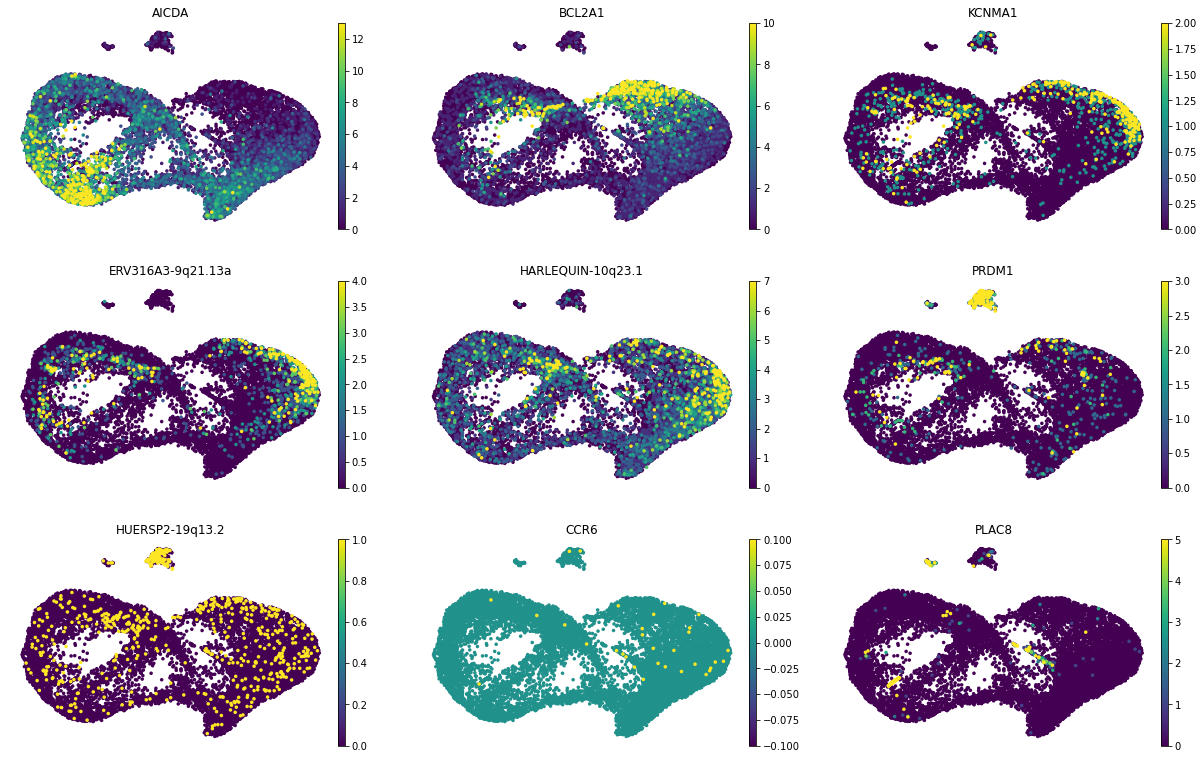

In [133]:
sc.pl.umap(adata_pre, color=["AICDA", "BCL2A1", "KCNMA1", "ERV316A3-9q21.13a", "HARLEQUIN-10q23.1", "PRDM1", "HUERSP2-19q13.2","CCR6", "PLAC8"], s=50, frameon=False, ncols=3, vmax='p99', components='1,3')

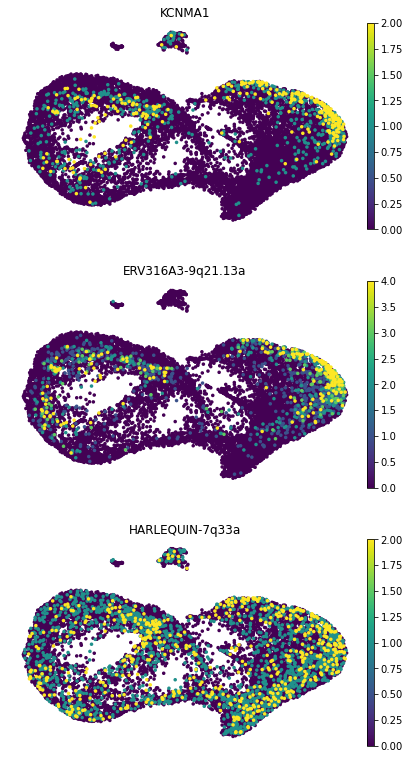

In [135]:
sc.pl.umap(adata_pre, color=["KCNMA1", "ERV316A3-9q21.13a", "HARLEQUIN-7q33a"], s=50, frameon=False, ncols=1, vmax='p99', components='1,3')

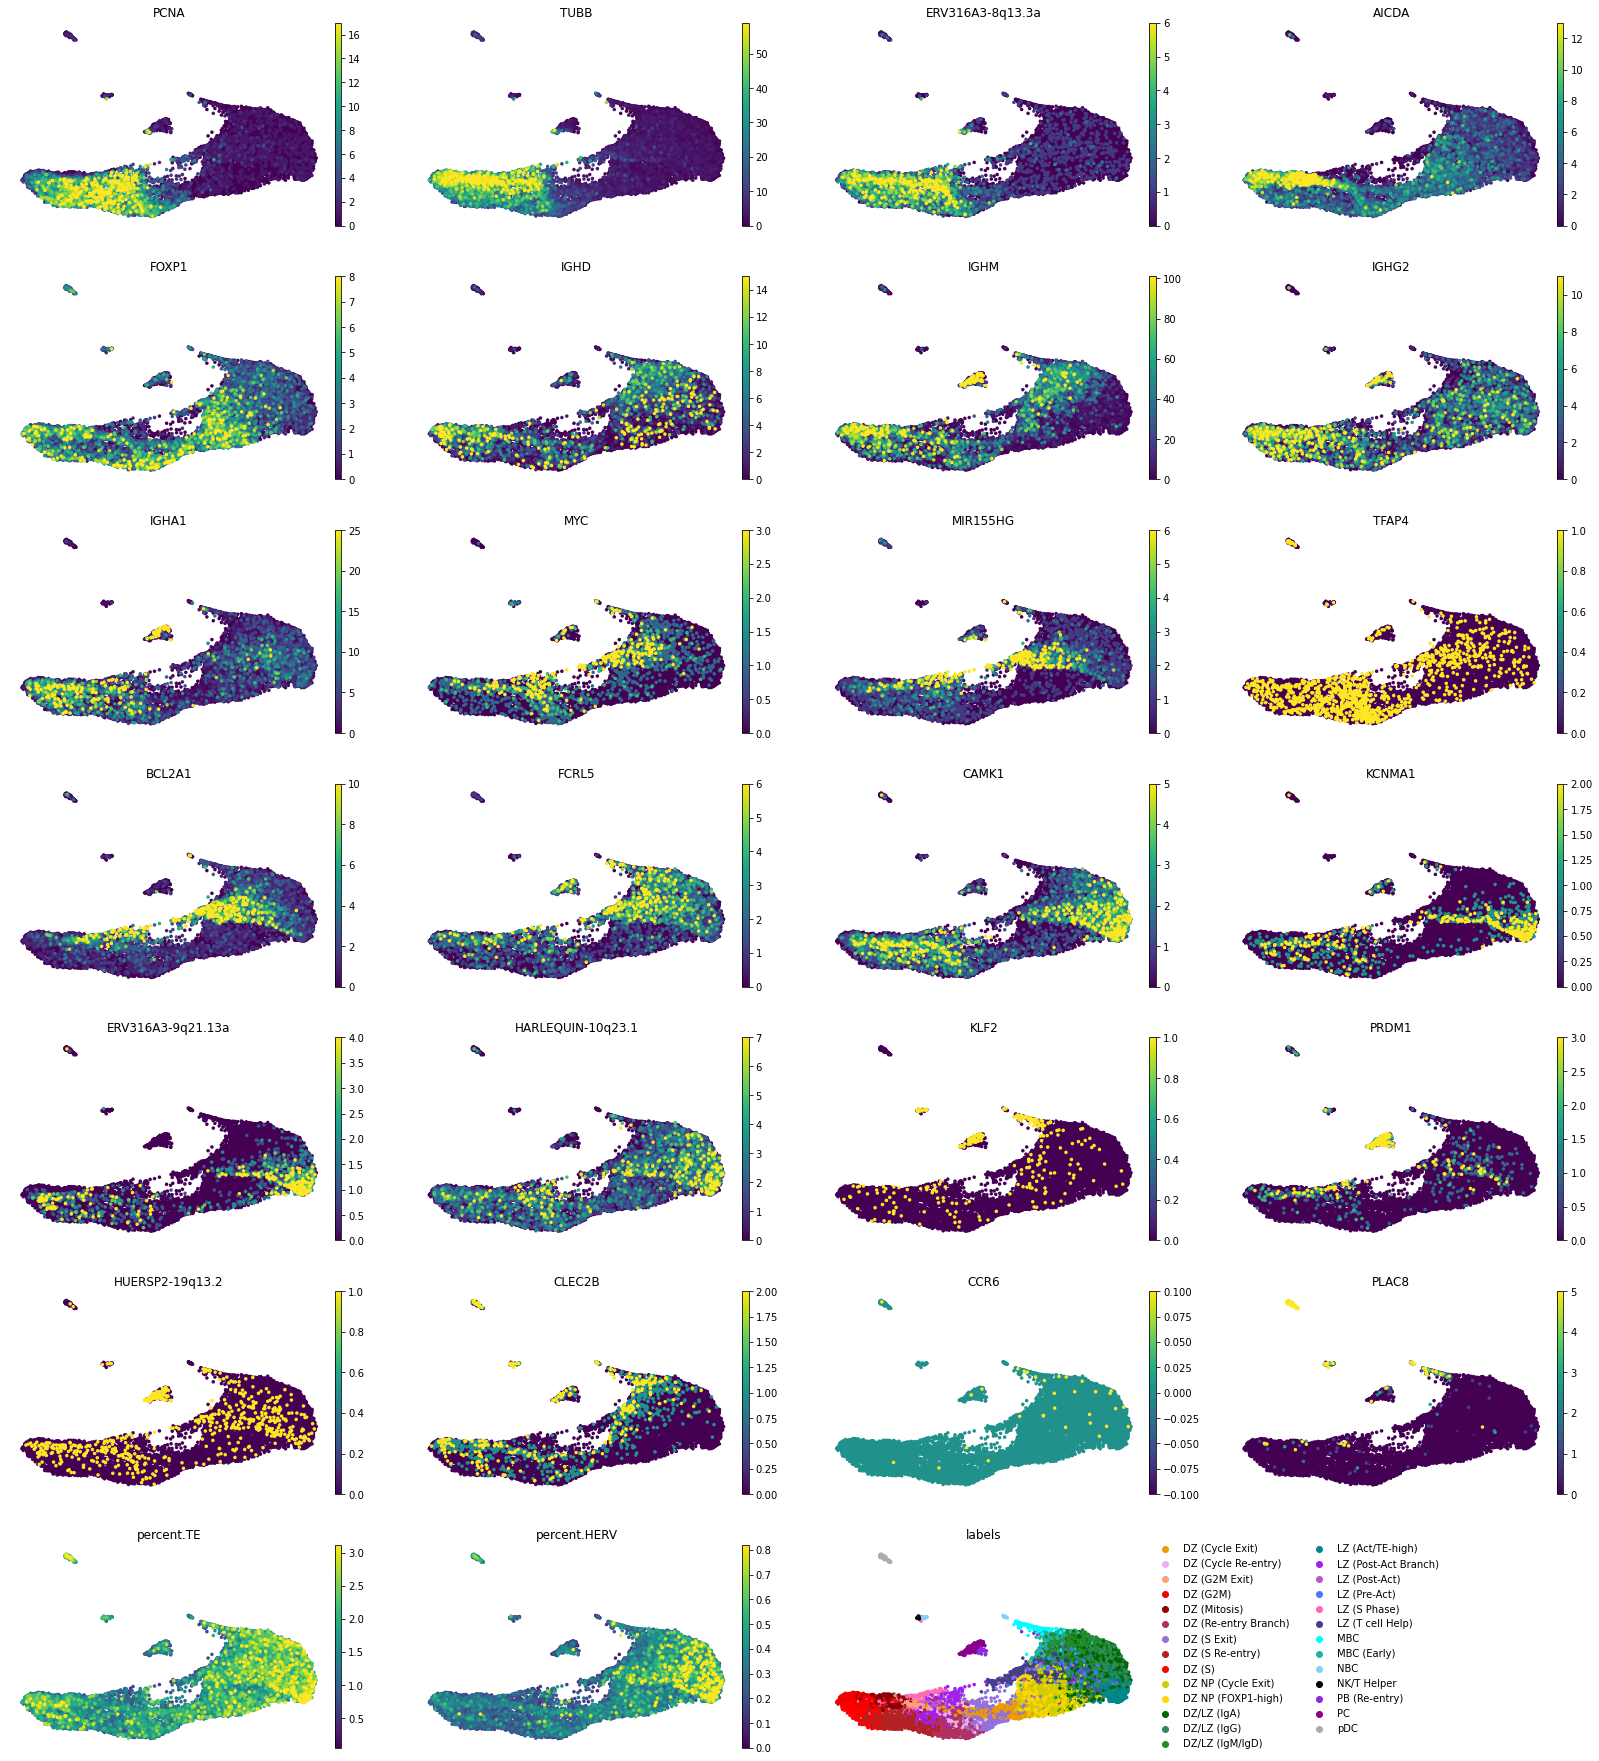

In [113]:
sc.pl.umap(adata_pre, color=["PCNA", "TUBB", "ERV316A3-8q13.3a", "AICDA", "FOXP1", "IGHD", "IGHM", "IGHG2", "IGHA1", "MYC", "MIR155HG", "TFAP4", "BCL2A1", "FCRL5", "CAMK1", "KCNMA1", "ERV316A3-9q21.13a", "HARLEQUIN-10q23.1", "KLF2", "PRDM1", "HUERSP2-19q13.2", "CLEC2B", "CCR6", "PLAC8", "percent.TE", "percent.HERV", "labels"], s=50, frameon=False, ncols=4, vmax='p99')

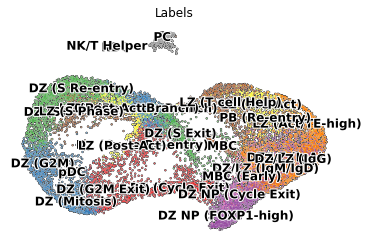

In [117]:
sc.pl.umap(adata_pre, color='labels', add_outline=True, legend_loc='on data',
               legend_fontsize=12, legend_fontoutline=2,frameon=False,
               title='Labels', palette =, components='1,3')

In [ ]:
import scvelo as scv
import scanpy as sc
import cellrank as cr
import numpy as np
import pandas as pd
import anndata as ad

In [ ]:
scv.settings.verbosity = 3
scv.settings.set_figure_params('scvelo', facecolor='white', dpi=100, frameon=False)
cr.settings.verbosity = 2
#adata = sc.read_h5ad('my_data.h5ad')

In [ ]:
# load loom files for spliced/unspliced matrices for each sample:
ldata1 = scv.read('/Users/jezmarston/Desktop/SRR11827034.loom', cache=True)
ldata2 = scv.read('/Users/jezmarston/Desktop/SRR11827035.loom', cache=True)

In [ ]:
# rename barcodes in order to merge:
barcodes = [bc.split(':')[1] for bc in ldata1.obs.index.tolist()]
barcodes = [bc[0:len(bc)-1] + '_10' for bc in barcodes]
ldata1.obs.index = barcodes

In [ ]:
barcodes = [bc.split(':')[1] for bc in ldata2.obs.index.tolist()]
barcodes = [bc[0:len(bc)-1] + '_11' for bc in barcodes]
ldata2.obs.index = barcodes

In [ ]:
# make variable names unique
ldata1.var_names_make_unique()
ldata2.var_names_make_unique()

In [ ]:
# concatenate the three loom
ldata = ldata1.concatenate(ldata2)

In [ ]:
# merge matrices into the original adata object
adata = scv.utils.merge(adata, ldata)

In [ ]:
# save dataset as anndata format
adata.write('my_data_3D.h5ad')

In [ ]:
# plot umap to check
sc.pl.umap(adata, color='labels', frameon=False, legend_loc='on data', title='', components='1,3', save='_retro_ident.pdf')

In [ ]:
# plot umap to check
sc.pl.umap(adata, color='labels', frameon=False, title='', components='1,3', save='_retro_ident.pdf')

In [ ]:
scv.pl.proportions(adata, groupby='labels', fontsize=4)

In [ ]:
# pre-process
scv.pp.filter_and_normalize(adata)
scv.pp.moments(adata)

In [ ]:
# compute velocity
scv.tl.velocity(adata, mode='stochastic')
scv.tl.velocity_graph(adata)

In [ ]:
scv.pl.velocity_embedding(adata, basis='umap', frameon=False, save='embedding.pdf', components='1,3')

In [ ]:
scv.pl.velocity_embedding_grid(adata, basis='umap', color='labels', save='embedding_grid.pdf', title='', scale=0.25, components='1,3')

In [ ]:
scv.pl.velocity_embedding_grid(adata, basis='umap', frameon=False, color='labels', save='embedding_grid.pdf', title='', scale=0.25, components='3,1')

In [ ]:
scv.pl.velocity_embedding_grid(adata, basis='umap', color='labels', save='embedding_grid.pdf', title='', scale=0.25, components='2,1')

In [ ]:
scv.pl.velocity_embedding_grid(adata, basis='umap', color='labels', save='embedding_grid.pdf', title='', scale=0.25, components='2,3')

In [ ]:
scv.pl.velocity_embedding_grid(adata, basis='umap', color='labels', save='embedding_grid.pdf', title='', scale=0.25, components='3,2')

In [ ]:
scv.pl.velocity_embedding_grid(adata, basis='umap', color='labels', save='embedding_grid.pdf', title='', scale=0.25, components='-1,3')

In [ ]:
scv.pl.velocity_embedding_grid(adata, basis='umap', color='labels', save='embedding_grid.pdf', title='', scale=0.25, components='1,2')

In [ ]:
scv.pl.velocity_embedding_grid(adata, basis='umap', color='labels', save='embedding_grid.pdf', title='', scale=0.25, components='2,1')

In [ ]:
scv.pl.velocity_embedding_stream(adata, basis='umap', color=['labels'], frameon=False, save='embedding_stream.pdf', legend_loc='right margin', title='', components='1,3')

In [ ]:
scv.pl.velocity_embedding_stream(adata, basis='umap', color=['labels'], frameon=False, save='embedding_stream.pdf', legend_loc='right margin', title='', components='1,3')

In [ ]:
umap = adata.obsm['X_umap']
velocity = adata.obsm['velocity_umap']
# color = adata.obs['global_time']
color = scv.utils.interpret_colorkey(adata, c="JLM_Labels")

fig = plt.figure(dpi=400)
ax = fig.add_subplot(111, projection='3d')
ax.scatter(umap[:, 0], umap[:, 1], umap[:, 2], c=color, cmap='viridis')

# prepare colors for the arrows
c = scv.utils.interpret_colorkey(adata, c="JLM_Labels")
c = list(c) + [element for element in list(c) for _ in range(2)]

# Plot the velocity projection
ax.quiver(umap[:, 0], umap[:, 1], umap[:, 2], velocity[:, 0], velocity[:, 1], velocity[:, 2], color='k',
          normalize=True, length=0.4, arrow_length_ratio=0.3, linewidth = 0.5)
ax.set_title('phenotypic manifold in high dimensions')
ax.view_init(None, 10)

# turn off the axis ticks
ax.set_xticklabels([])
ax.set_yticklabels([])
ax.set_zticklabels([])

# ax.set_xlabel('20k dimensions')
#plt.savefig(f"{figdir}/high_dim_projection.pdf")
plt.show()

In [ ]:
# save dataset as anndata format
adata.write('my_data_3D.h5ad')

In [ ]:
adata

In [ ]:
scv.pl.velocity(adata, var_names=['BCL2A1'], color='labels')

In [ ]:
scv.pl.velocity(adata, var_names=['BCL2A1'], color='labels', components = '1,3')

In [ ]:
scv.pl.velocity(adata, var_names=['AICDA'], color='labels')

In [ ]:
scv.pl.velocity(adata, var_names=['AICDA'], color='labels', components = '1,3')

In [ ]:
scv.pl.velocity(adata, var_names=['AICDA'], color='labels', components = '1,3')

In [ ]:
scv.pl.velocity(adata, var_names=['KCNMA1'], color='labels')

In [ ]:
scv.pl.velocity(adata, var_names=['KCNMA1'], color='labels')

In [ ]:
scv.pl.velocity(adata, var_names=['KCNMA1'], color='labels', components = '1,3')

In [ ]:
scv.pl.velocity(adata, var_names=['KCNMA1'], color='labels', components = '1,3')

In [ ]:
scv.pl.velocity(adata, var_names=['IGHA2'], color='labels')

In [ ]:
scv.pl.velocity(adata, var_names=['IGHD'], color='labels')

In [ ]:
scv.pl.velocity(adata, var_names=['IGHD'], color='labels')

In [ ]:
scv.pl.velocity(adata, var_names=['IGHD'], color='labels', components = '1,3')

In [ ]:
scv.pl.velocity(adata, var_names=['IGHD'], color='labels', components = '1,3')

In [ ]:
scv.tl.rank_velocity_genes(adata, groupby='labels', min_corr=.3)

In [ ]:
df = scv.DataFrame(adata.uns['rank_velocity_genes']['names'])
df.head()

In [ ]:
scv.tl.velocity_confidence(adata)
keys = 'velocity_length', 'velocity_confidence'
scv.pl.scatter(adata, c=keys, cmap='coolwarm', perc=[5, 95], components='1,3')

In [ ]:
scv.tl.velocity_confidence(adata)
keys = 'velocity_length', 'velocity_confidence'
scv.pl.scatter(adata, c=keys, cmap='coolwarm', perc=[5, 95], components='1,3')

In [ ]:
scv.tl.velocity_confidence(adata)
keys = 'velocity_length', 'velocity_confidence'
scv.pl.scatter(adata, c=keys, cmap='coolwarm', perc=[5, 95])

In [ ]:
scv.tl.velocity_confidence(adata)
keys = 'velocity_length', 'velocity_confidence'
scv.pl.scatter(adata, c=keys, cmap='coolwarm', perc=[5, 95])

In [ ]:
scv.pl.velocity_graph(adata, threshold=.1, color='labels', components='1,3')

In [ ]:
x, y, z = scv.utils.get_cell_transitions(adata, basis='umap', starting_cell=0)
ax = scv.pl.velocity_graph(adata, c='lightgrey', edge_width=.05, show=False)
ax = scv.pl.scatter(adata, x=x, y=y, s=120, c='ascending', cmap='gnuplot', ax=ax, components='1,3')

In [ ]:
scv.tl.velocity_pseudotime(adata)
scv.pl.scatter(adata, color='velocity_pseudotime', cmap='gnuplot', components='1,3')

In [ ]:
scv.tl.velocity_pseudotime(adata)
scv.pl.scatter(adata, color='velocity_pseudotime', cmap='gnuplot', components='1,3')

In [ ]:
# this is needed due to a current bug - bugfix is coming soon.
adata.uns['neighbors']['distances'] = adata.obsp['distances']
adata.uns['neighbors']['connectivities'] = adata.obsp['connectivities']

In [ ]:
scv.tl.paga(adata, groups='labels')
df = scv.get_df(adata, 'paga/transitions_confidence').T
df.style.background_gradient(cmap='Blues').format('{:.2g}')

In [ ]:
scv.pl.paga(adata, basis='umap', size=50, alpha=.1,
            min_edge_width=2, node_size_scale=1.5, components = '1,3')

In [ ]:
umap = adata.obsm['X_umap']
velocity = adata.obsm['velocity_umap']
color = adata.obs['velocity_pseudotime']
# color = scv.utils.interpret_colorkey(adata, c="velocity_pseudotime")

fig = plt.figure(dpi=400, figsize=(2,2))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(umap[:, 0], umap[:, 1], umap[:, 2], c=color, cmap='viridis')

# prepare colors for the arrows
c = scv.utils.interpret_colorkey(adata, c="velocity_pseudotime")
c = list(c) + [element for element in list(c) for _ in range(2)]

# Plot the velocity projection
# ax.quiver(umap[:, 0], umap[:, 1], umap[:, 2], velocity[:, 0], velocity[:, 1], velocity[:, 2], color='k',
#          normalize=True, length=0.4, arrow_length_ratio=0.3, linewidth = 0.5)
ax.set_title('UMAP 3D Pseudotime')
ax.view_init(None, 10)

# turn off the axis ticks
ax.set_xticklabels([])
ax.set_yticklabels([])
ax.set_zticklabels([])

# ax.set_xlabel('20k dimensions')
plt.savefig("high_dim_projection.pdf")
plt.show()

In [ ]:
sc.pp.neighbors(adata, n_neighbors=15, use_rep='X_pca')

In [ ]:
# save dataset as anndata format
adata.write('my_data_3D.h5ad')

In [ ]:
adata

In [ ]:
spliced = adata.layers['spliced']
unspliced = adata.layers['unspliced']
clusters = adata.obs['labels']
pcs = adata.obsm['X_pca']

#choose colors based on clusters for plotting later
#cell.cols = rainbow(8)[as.numeric(labels)]
#names(cell.cols) = names(labels)

In [ ]:
#cell distance in PC space
cell.dist = as.dist(1-cor(t(pcs))) # cell distance in PC space

vel = gene.relative.velocity.estimates(spliced,
                                       unspliced,
                                       kCells = 30,
                                       cell.dist = cell.dist,
                                       fit.quantile = 0.1)

#(or use precomputed velocity object)
# vel = pancreas$vel

In [ ]:
import scanpy as sc
from scipy import io

In [ ]:
!mkdir matrix_files

In [ ]:
with open('matrix_files/barcodes.tsv', 'w') as f:
    for item in adata.obs_names:
        f.write(item + '\n')

In [ ]:
with open('matrix_files/features.tsv', 'w') as f:
    for item in ['\t'.join([x,x,'Gene Expression']) for x in adata.var_names]:
        f.write(item + '\n')

In [ ]:
io.mmwrite('matrix_files/matrix', adata.X.T)

In [ ]:
!ls matrix_files/

In [ ]:
!gzip matrix_files/*

In [ ]:
adata.obs.to_csv('metadata.csv')

In [ ]:
# pre-process
scv.pp.filter_and_normalize(adata)
scv.pp.moments(adata)

In [ ]:
scv.tl.recover_dynamics(adata)

In [ ]:
scv.pl.velocity_embedding_stream(adata, basis='umap', color=['labels'], save='embedding_stream_3D.pdf', title='', components = '1,3')

In [ ]:
df = adata.var
df = df[(df['fit_likelihood'] > .1) & df['velocity_genes'] == True]

kwargs = dict(xscale='log', fontsize=16)
with scv.GridSpec(ncols=3) as pl:
    pl.hist(df['fit_alpha'], xlabel='transcription rate', **kwargs)
    pl.hist(df['fit_beta'] * df['fit_scaling'], xlabel='splicing rate', xticks=[.1, .4, 1], **kwargs)
    pl.hist(df['fit_gamma'], xlabel='degradation rate', xticks=[.1, .4, 1], **kwargs)

scv.get_df(adata, 'fit*', dropna=True).head()

In [ ]:
scv.tl.latent_time(adata)
scv.pl.scatter(adata, color='latent_time', color_map='gnuplot', size=80, components='1,3')

In [ ]:
scv.tl.latent_time(adata)
scv.pl.scatter(adata, color='latent_time', size=80)

In [ ]:
scv.tl.latent_time(adata)
scv.pl.scatter(adata, color='latent_time', size=80)

In [ ]:
scv.tl.latent_time(adata)
scv.pl.scatter(adata, color='latent_time', color_map='gnuplot', size=80)

In [ ]:
scv.tl.latent_time(adata)
scv.pl.scatter(adata, color='latent_time', color_map='gnuplot', size=80, components='1,3')

In [ ]:
top_genes = adata.var['fit_likelihood'].sort_values(ascending=False).index[:300]

chosen_genes = adata.var

scv.pl.heatmap(adata, var_names=top_genes, sortby='latent_time', col_color='labels', n_convolve=100)

In [ ]:
top_genes

In [ ]:
top_genes = adata.var['fit_likelihood'].sort_values(ascending=False).index[:300]
scv.pl.heatmap(adata, var_names=top_genes, sortby='latent_time', col_color='labels', n_convolve=100)

In [ ]:
genes = adata.var['fit_likelihood'].sort_values(ascending=False).index[:300]
scv.pl.heatmap(adata, var_names=top_genes, sortby='latent_time', col_color='labels', n_convolve=100)

In [ ]:
scv.pp.filter_and_normalize(adata, min_shared_counts=20, n_top_genes=2000)
sc.tl.pca(adata)
sc.pp.neighbors(adata, n_pcs=30, n_neighbors=30)
scv.pp.moments(adata, n_pcs=None, n_neighbors=None)

In [ ]:
scv.tl.recover_dynamics(adata, n_jobs=8)

In [ ]:
scv.tl.velocity(adata, mode="dynamical")
scv.tl.velocity_graph(adata)

In [ ]:
scv.pl.velocity_embedding_stream(
    adata, basis="umap", legend_fontsize=12, title="", smooth=0.8, min_mass=4, components='1,3'
)

In [ ]:
cr.tl.terminal_states(adata, cluster_key="labels", weight_connectivities=0.2)

In [ ]:
cr.tl.lineage_drivers(adata)

In [ ]:
cr.pl.terminal_states(adata, components ='1,3')

In [ ]:
cr.pl.terminal_states(adata, discrete=True, components ='1,3')

In [ ]:
cr.pl.initial_states(adata, components = '1,3')

In [ ]:
cr.tl.initial_states(adata, cluster_key="labels")
cr.pl.initial_states(adata, discrete=True, components = '1,3')

In [ ]:
cr.pl.initial_states(adata, discrete=True, components = '1,3')

In [ ]:
cr.tl.lineages(adata)
cr.pl.lineages(adata, same_plot=False, components = '1,3')

In [ ]:
cr.pl.lineages(adata, same_plot=True, components = '1,3')

In [ ]:
scv.tl.recover_latent_time(
    adata, root_key="initial_states_probs", end_key="terminal_states_probs"
)

In [ ]:
scv.tl.paga(
    adata,
    groups="labels",
    root_key="initial_states_probs",
    end_key="terminal_states_probs",
    use_time_prior="velocity_pseudotime",
)

In [ ]:
cr.pl.cluster_fates(
    adata,
    mode="paga_pie",
    cluster_key="labels",
    basis="umap",
    legend_kwargs={"loc": "top right out"},
    legend_loc="top left out",
    node_size_scale=5,
    edge_width_scale=1,
    max_edge_width=4,
    title="directed PAGA",
    components = '1,3'
)

In [ ]:
cr.tl.lineage_drivers(adata)

In [ ]:
cr.pl.lineage_drivers(adata, lineage="LZ (Act/TE-high)", n_genes=4, components = '1,3')

In [ ]:
cr.pl.lineage_drivers(adata, lineage="LZ (Act/TE-high)", n_genes=12, components = '1,3')

In [ ]:
# compue DPT, starting from CellRank defined root cell
root_idx = np.where(adata.obs["initial_states"] == "LZ (Post-Act Branch)")[0][0]
adata.uns["iroot"] = root_idx
sc.tl.dpt(adata)

scv.pl.scatter(
    adata,
    color=["labels", root_idx, "latent_time", "dpt_pseudotime"],
    fontsize=16,
    cmap="viridis",
    perc=[2, 98],
    colorbar=True,
    rescale_color=[0, 1],
    title=["labels", "root cell", "latent time", "dpt pseudotime"],
    components = '1,3'
)

In [ ]:
model = cr.ul.models.GAM(adata)
cr.pl.gene_trends(
    adata,
    model=model,
    data_key="X",
    genes=["AICDA", "BCL2A1", "PRDM1"],
    ncols=3,
    time_key="latent_time",
    same_plot=True,
    hide_cells=True,
    figsize=(15, 4),
    n_test_points=200,
    components = '1,3'
)

In [ ]:
model = cr.ul.models.GAM(adata)
cr.pl.gene_trends(
    adata,
    model=model,
    data_key="X",
    genes=["HARLEQUIN-1p33"],
    ncols=3,
    time_key="latent_time",
    same_plot=True,
    hide_cells=True,
    figsize=(15, 4),
    n_test_points=200,
)

In [ ]:
cr.pl.heatmap(
    adata,
    model,
    genes=adata.varm['terminal_lineage_drivers']["LZ (Act/TE-high)_corr"].sort_values(ascending=False).index[:100],
    show_absorption_probabilities=True,
    lineages="LZ (Act/TE-high)",
    n_jobs=1,
    backend="loky",
)

In [ ]:
var_names = ['AICDA', 'BCL2A1', 'KCNMA1']
scv.pl.scatter(adata, var_names, color='labels', frameon=False)
scv.pl.scatter(adata, x='latent_time', y=var_names, color='labels', frameon=False)

In [ ]:
var_names = ['PRDM1', 'PLAC8', 'MS4A1']
scv.pl.scatter(adata, var_names, color='labels', frameon=False)
scv.pl.scatter(adata, x='latent_time', y=var_names, color='labels', frameon=False)

In [ ]:
var_names = ['IGHD', 'IGHM', 'IGHA2', 'IGHG3']
scv.pl.scatter(adata, var_names, color='labels', frameon=False)
scv.pl.scatter(adata, x='latent_time', y=var_names, color='labels', frameon=False)

In [136]:
import sys

if "google.colab" in sys.modules:
    !pip install -q git+https://github.com/theislab/cellrank@dev

In [137]:
import scvelo as scv
import scanpy as sc
import cellrank as cr
import numpy as np

scv.settings.verbosity = 3
scv.settings.set_figure_params("scvelo")
cr.settings.verbosity = 2

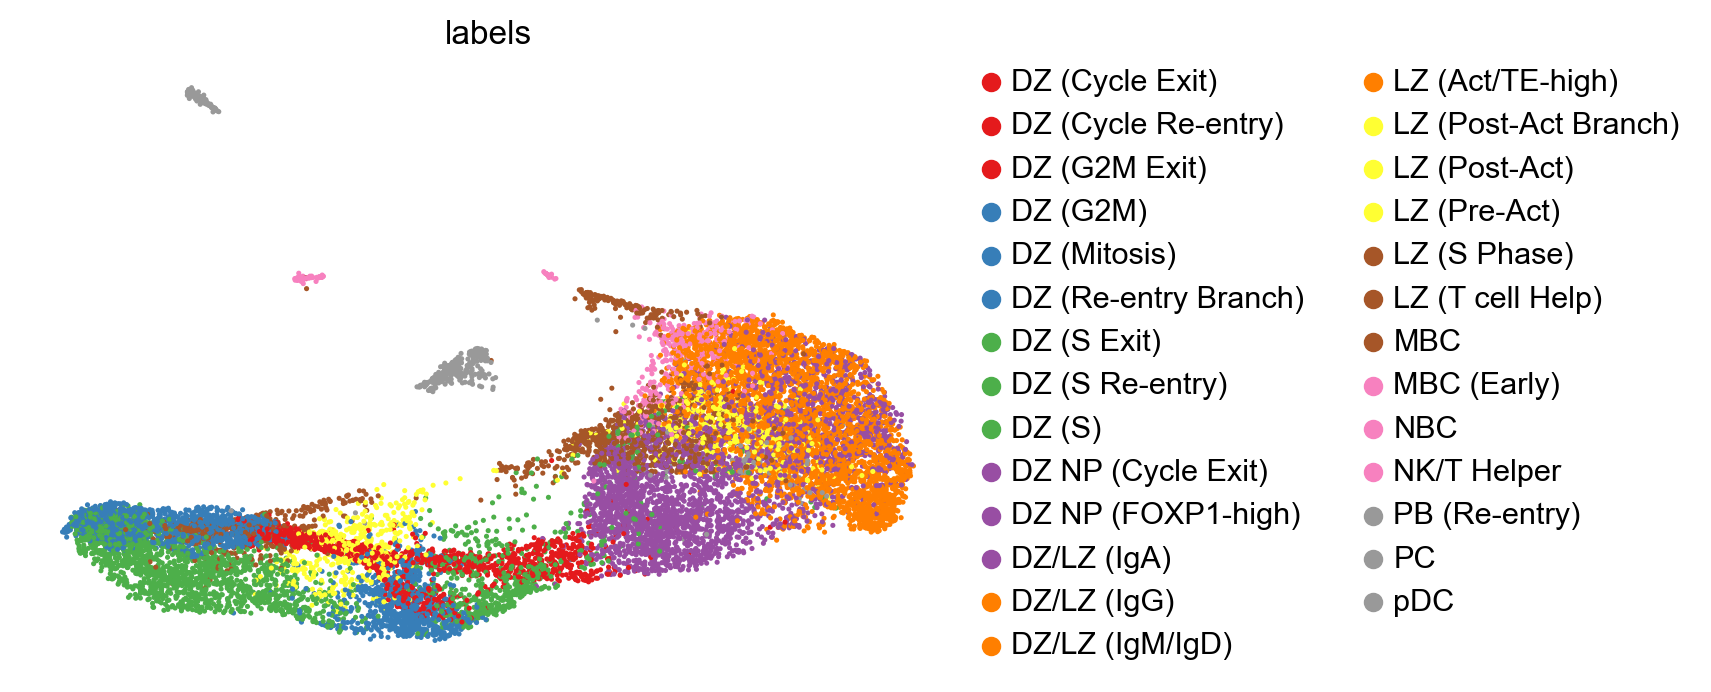

In [140]:
scv.pl.scatter(adata_pre, c="labels", legend_loc="right")

In [139]:
# filter, normalize total counts and log-transform
sc.pp.filter_genes(adata_pre, min_cells=10)
scv.pp.normalize_per_cell(adata_pre)
sc.pp.log1p(adata_pre)

# hvg annotation
sc.pp.highly_variable_genes(adata_pre)
print(f"This detected {np.sum(adata_pre.var['highly_variable'])} highly variable genes. ")

# use scVelo's `moments` function for imputation - note that hack we're using here:
# we're copying our `.X` matrix into the layers because that's where `scv.tl.moments`
# expects to find counts for imputation
adata_pre.layers["spliced"] = adata_pre.X
adata_pre.layers["unspliced"] = adata_pre.X
scv.pp.moments(adata_pre, n_pcs=30, n_neighbors=30)

Normalized count data: X.
This detected 2277 highly variable genes. 
computing neighbors
    finished (0:00:16) --> added 
    'distances' and 'connectivities', weighted adjacency matrices (adata.obsp)
computing moments based on connectivities
    finished (0:00:25) --> added 
    'Ms' and 'Mu', moments of un/spliced abundances (adata.layers)


In [141]:
from cellrank.tl.kernels import CytoTRACEKernel

ctk = CytoTRACEKernel(adata_pre)

Computing CytoTRACE score with `30680` genes
Adding `adata.obs['ct_score']`
       `adata.obs['ct_pseudotime']`
       `adata.obs['ct_num_exp_genes']`
       `adata.var['ct_gene_corr']`
       `adata.var['ct_correlates']`
       `adata.uns['ct_params']`
    Finish (0:00:02)


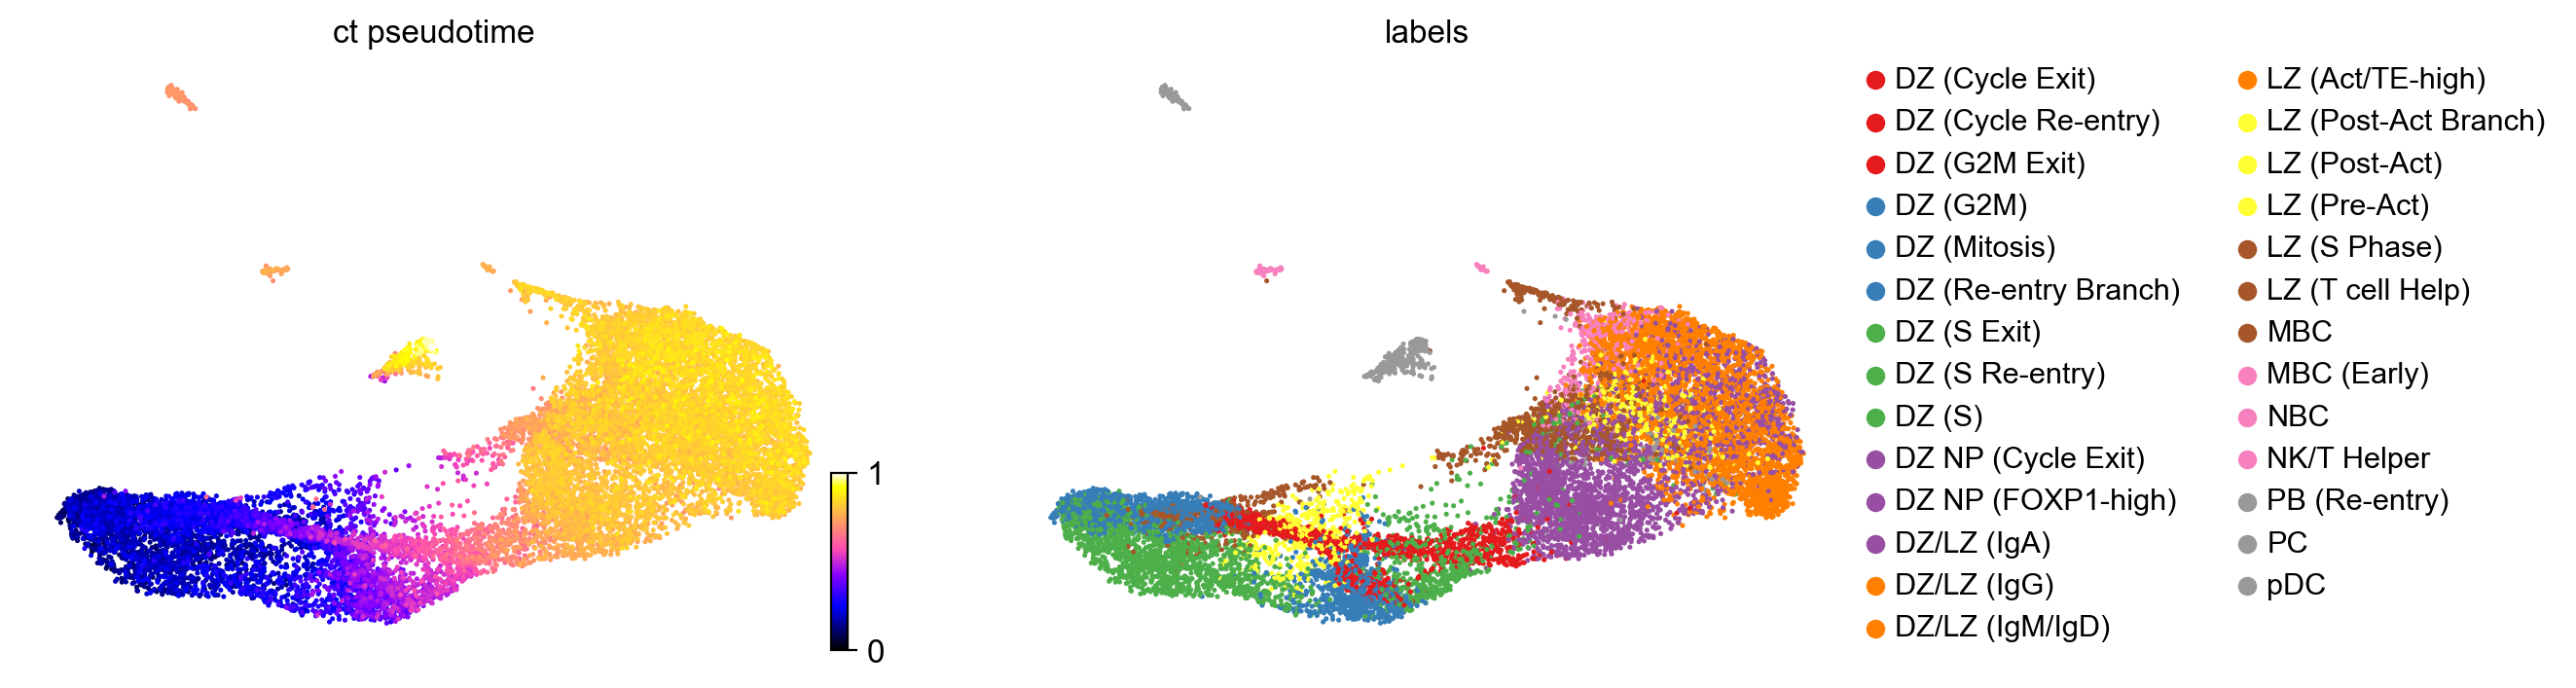

In [146]:
scv.pl.scatter(
    adata_pre,
    c=["ct_pseudotime", "labels"],
    legend_loc="right",
    color_map="gnuplot2",
)

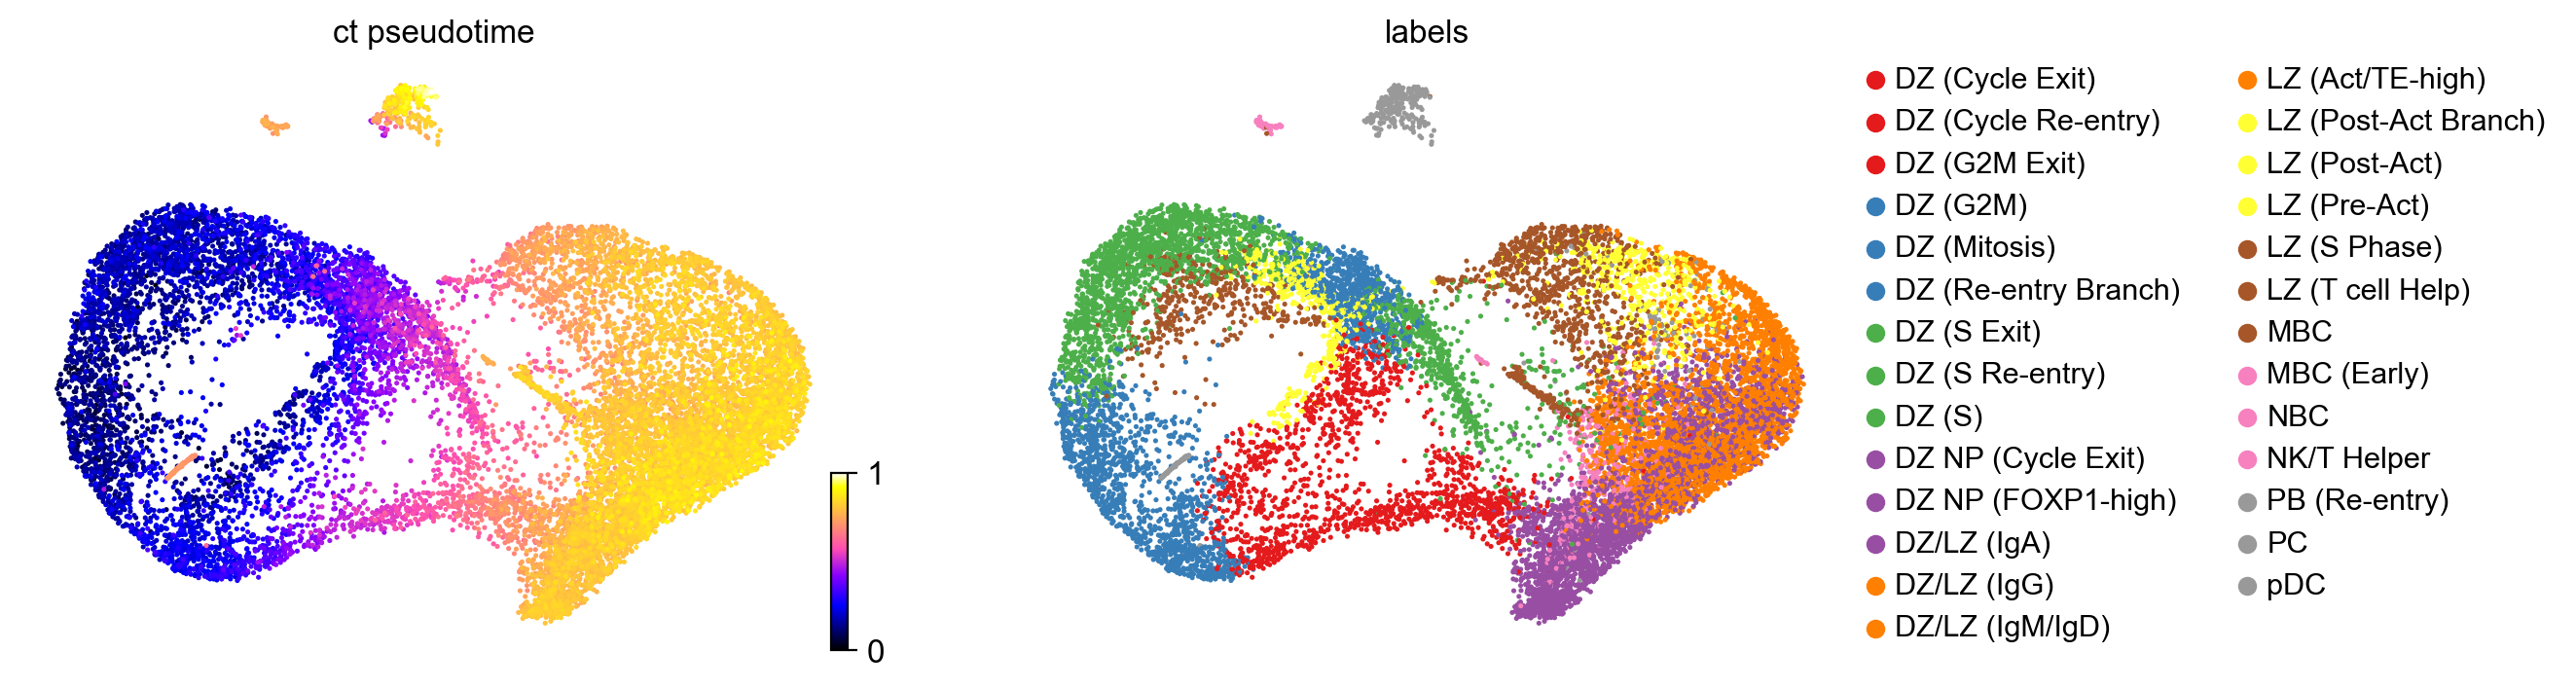

In [147]:
scv.pl.scatter(
    adata_pre,
    c=["ct_pseudotime", "labels"],
    components = '1,3',
    legend_loc="right",
    color_map="gnuplot2",
)

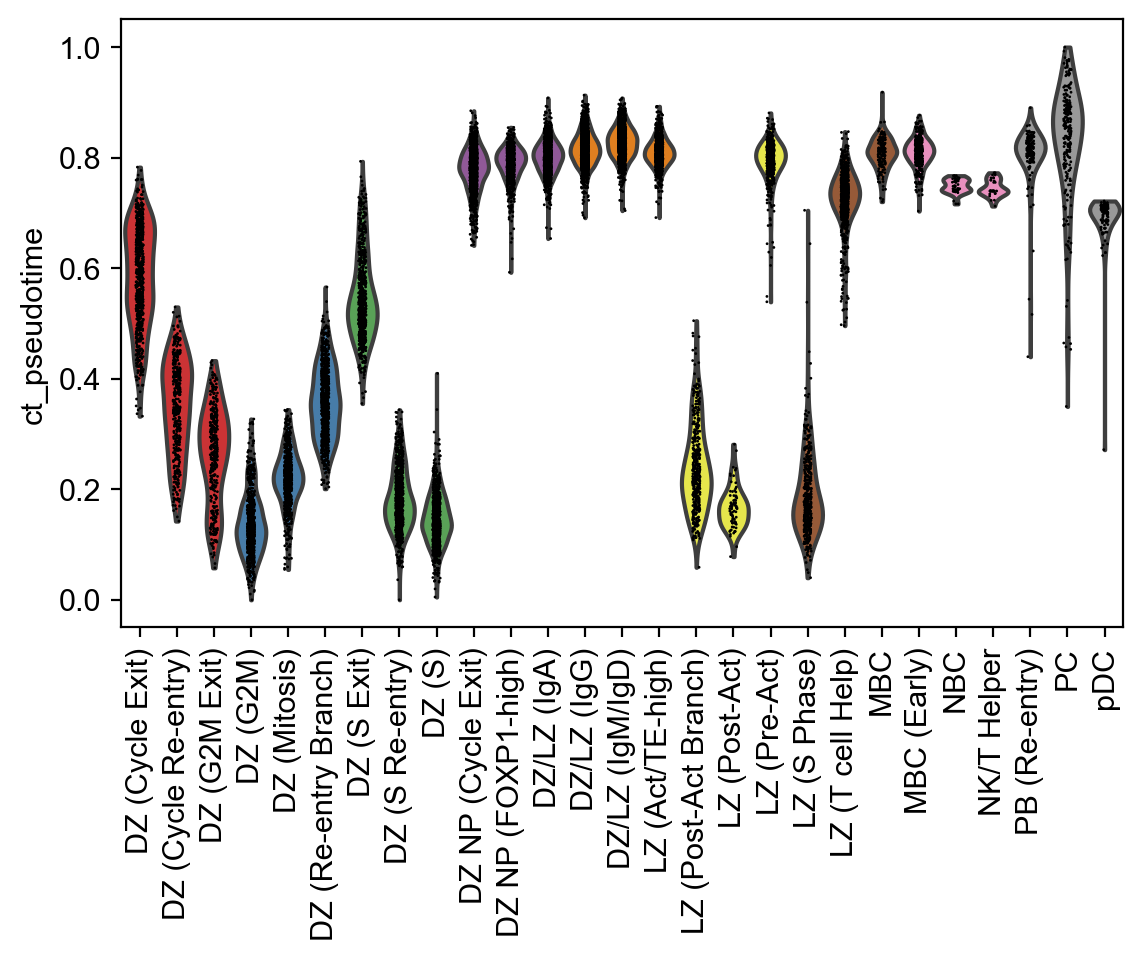

In [142]:
sc.pl.violin(adata_pre, keys=["ct_pseudotime"], groupby="labels", rotation=90)